In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from problems import Metric

In [68]:
def benchmark_pb(pb, is_drawable=False, show_sol=False, ergo=True, no_ergo=True, eg_eta=1, n_iter=100, title=None, **kargs):
    if is_drawable:
        pb.plot_fct()

    if is_drawable or show_sol:
        trials = pb.run_trials(n_iter=1000, n_trials=1, ergodic=False, eg_eta=eg_eta, **kargs)

    if is_drawable:
        pb.compare_trials_path(trials)

    pb.plot_trials_convergence(trials, Metric.OPT_DIST, title=title if title else 'non-ergodic', show_metric_title=False)
    pb.plot_trials_convergence(trials, Metric.GRAD_NORM, title=title if title else 'non-ergodic', show_metric_title=False)

    if show_sol:
        for algo, algo_trials in trials.items():
            trial = algo_trials[0]
            print(f'''Solution {algo}:
                {trial[-1][0]}
                {trial[-1][1]}''')

    if is_drawable:
        trials = pb.run_trials(n_iter=1000, n_trials=1, ergodic=True, eg_eta=eg_eta, **kargs)
        pb.compare_trials_path(trials, title='ergodic')



    # if no_ergo:
    #     trials_no_ergo = pb.run_trials(n_iter=n_iter, n_trials=100, ergodic=False, eg_eta=eg_eta, **kargs)
    #     pb.plot_trials_convergence(trials_no_ergo, Metric.OPT_DIST, title=title if title else 'non-ergodic', show_metric_title=False)
    #     pb.plot_trials_convergence(trials_no_ergo, Metric.GRAD_NORM, title=title if title else 'non-ergodic', show_metric_title=False)

    # if ergo:
    #     trials_ergo = pb.run_trials(n_iter=n_iter, n_trials=100, ergodic=True, eg_eta=eg_eta, **kargs)
    #     pb.plot_trials_convergence(trials_ergo, Metric.OPT_DIST, title=title if title else 'ergodic')
    #     pb.plot_trials_convergence(trials_ergo, Metric.GRAD_NORM, title=title if title else 'ergodic')

# Bilinear

$$
\min_{\theta} \max_{\phi} (\theta - x_1^*) (\phi - x_2^*)
$$

trials ({'eg_eta': 1, 'ergodic': True}): 100%|██████████| 20/20 [00:01<00:00, 14.34it/s]


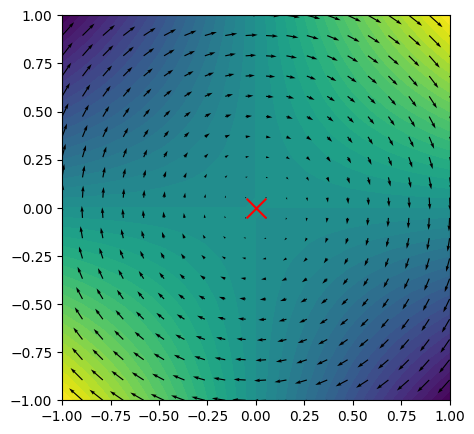

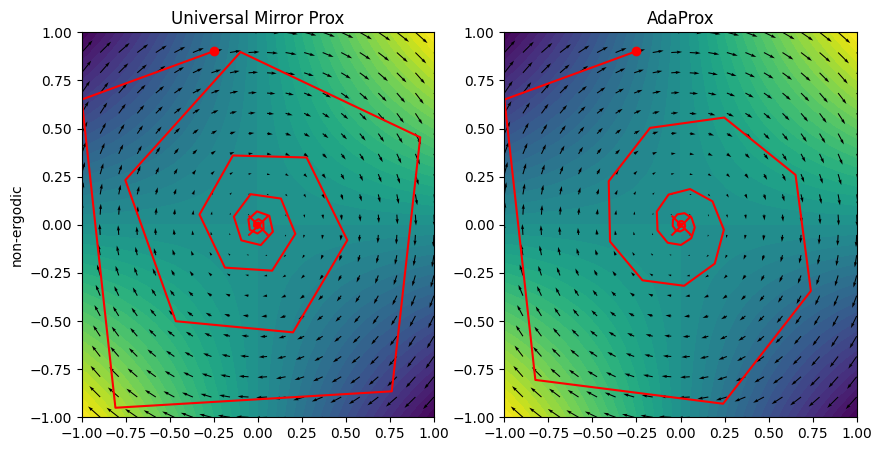

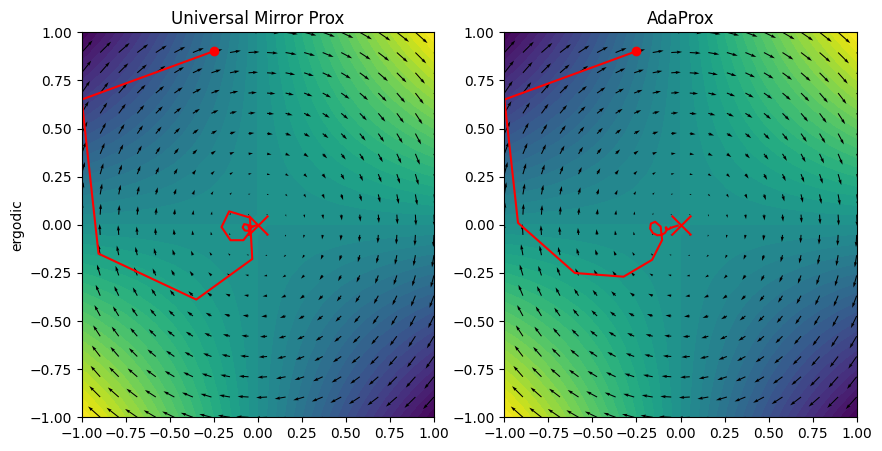

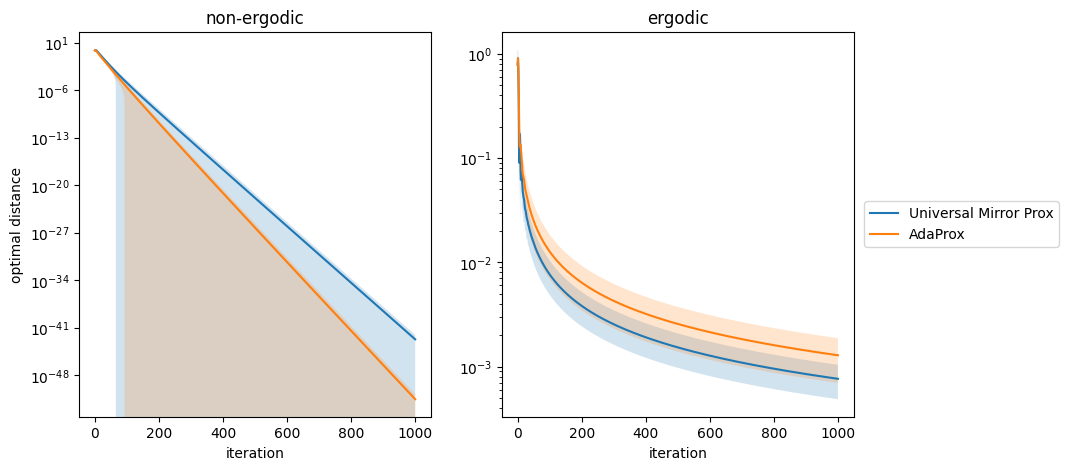

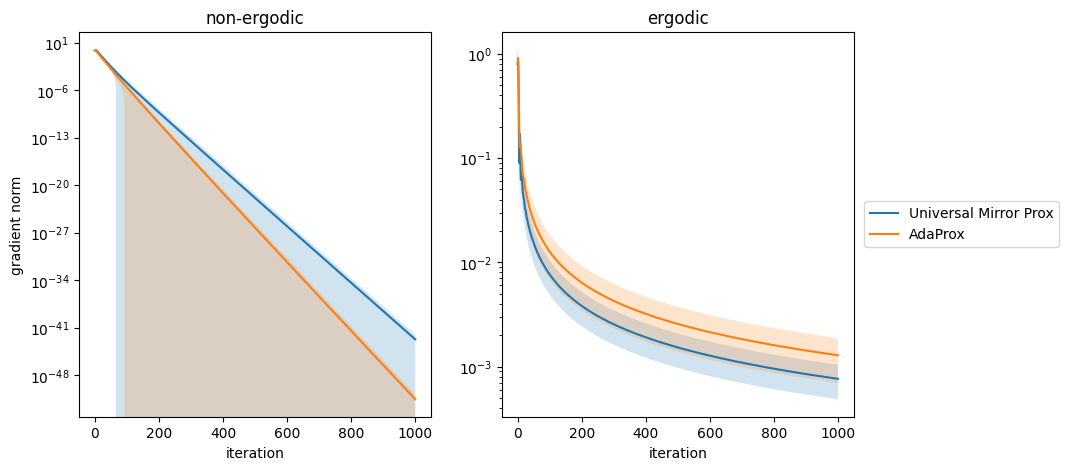

In [115]:
from problems import BilinearPb

pb = BilinearPb()
benchmark_pb(pb, is_drawable=True)

# Rock-Paper-Scissors

trials ({'ergodic': False, 'eg_eta': 0.5}): 100%|██████████| 1/1 [00:00<00:00, 42.20it/s]


Solution Extra Gradient:
                [0.33334463 0.33331939 0.33333598]
                [0.33332559 0.33334553 0.33332888]
Solution Universal Mirror Prox:
                [0.3333407  0.33332018 0.33333911]
                [0.33332982 0.33334337 0.33332681]
Solution AdaProx:
                [0.33333476 0.33333206 0.33333318]
                [0.33333208 0.33333436 0.33333356]


trials ({'ergodic': False, 'eg_eta': 0.5}): 100%|██████████| 100/100 [00:02<00:00, 48.88it/s]


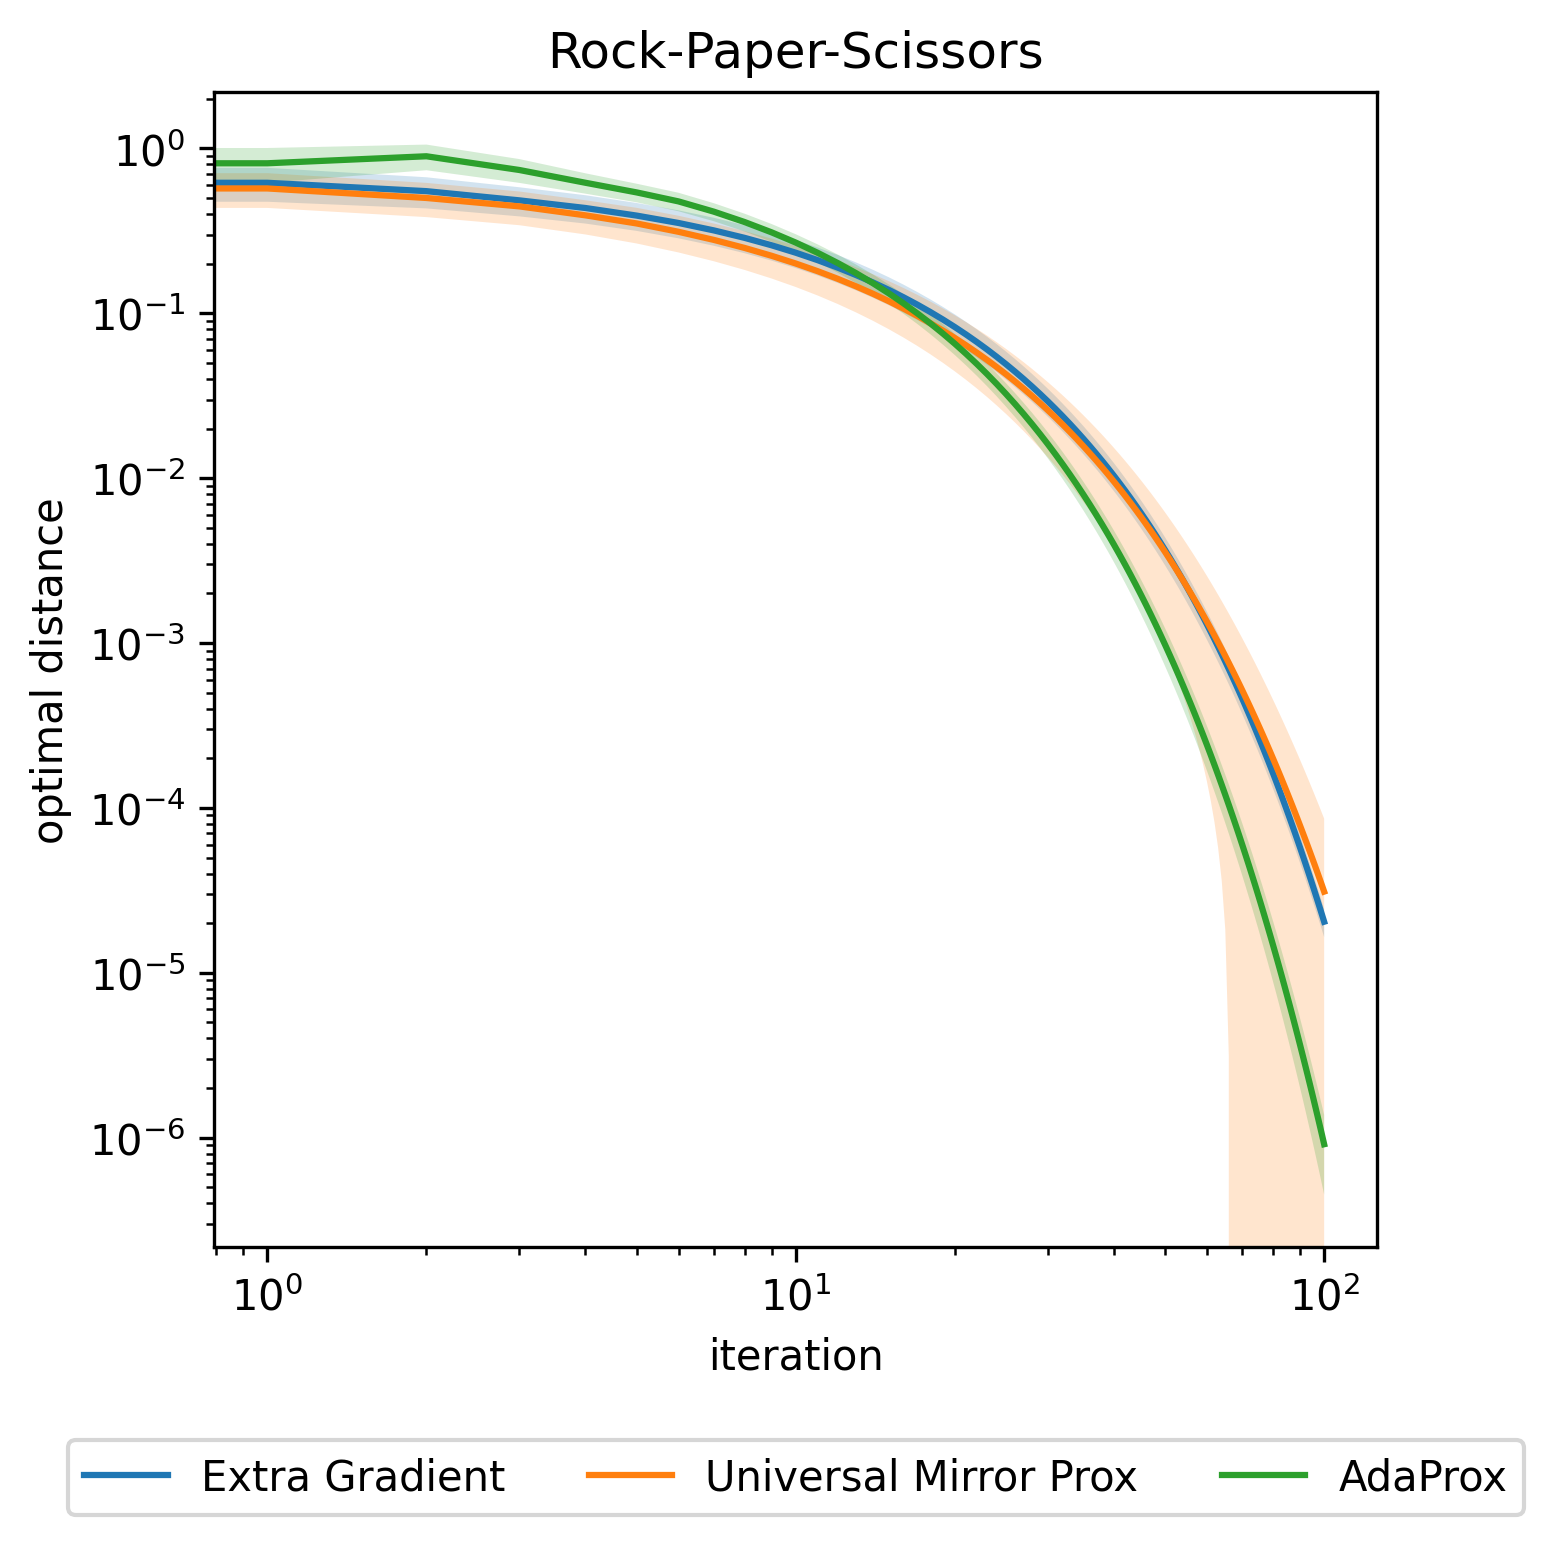

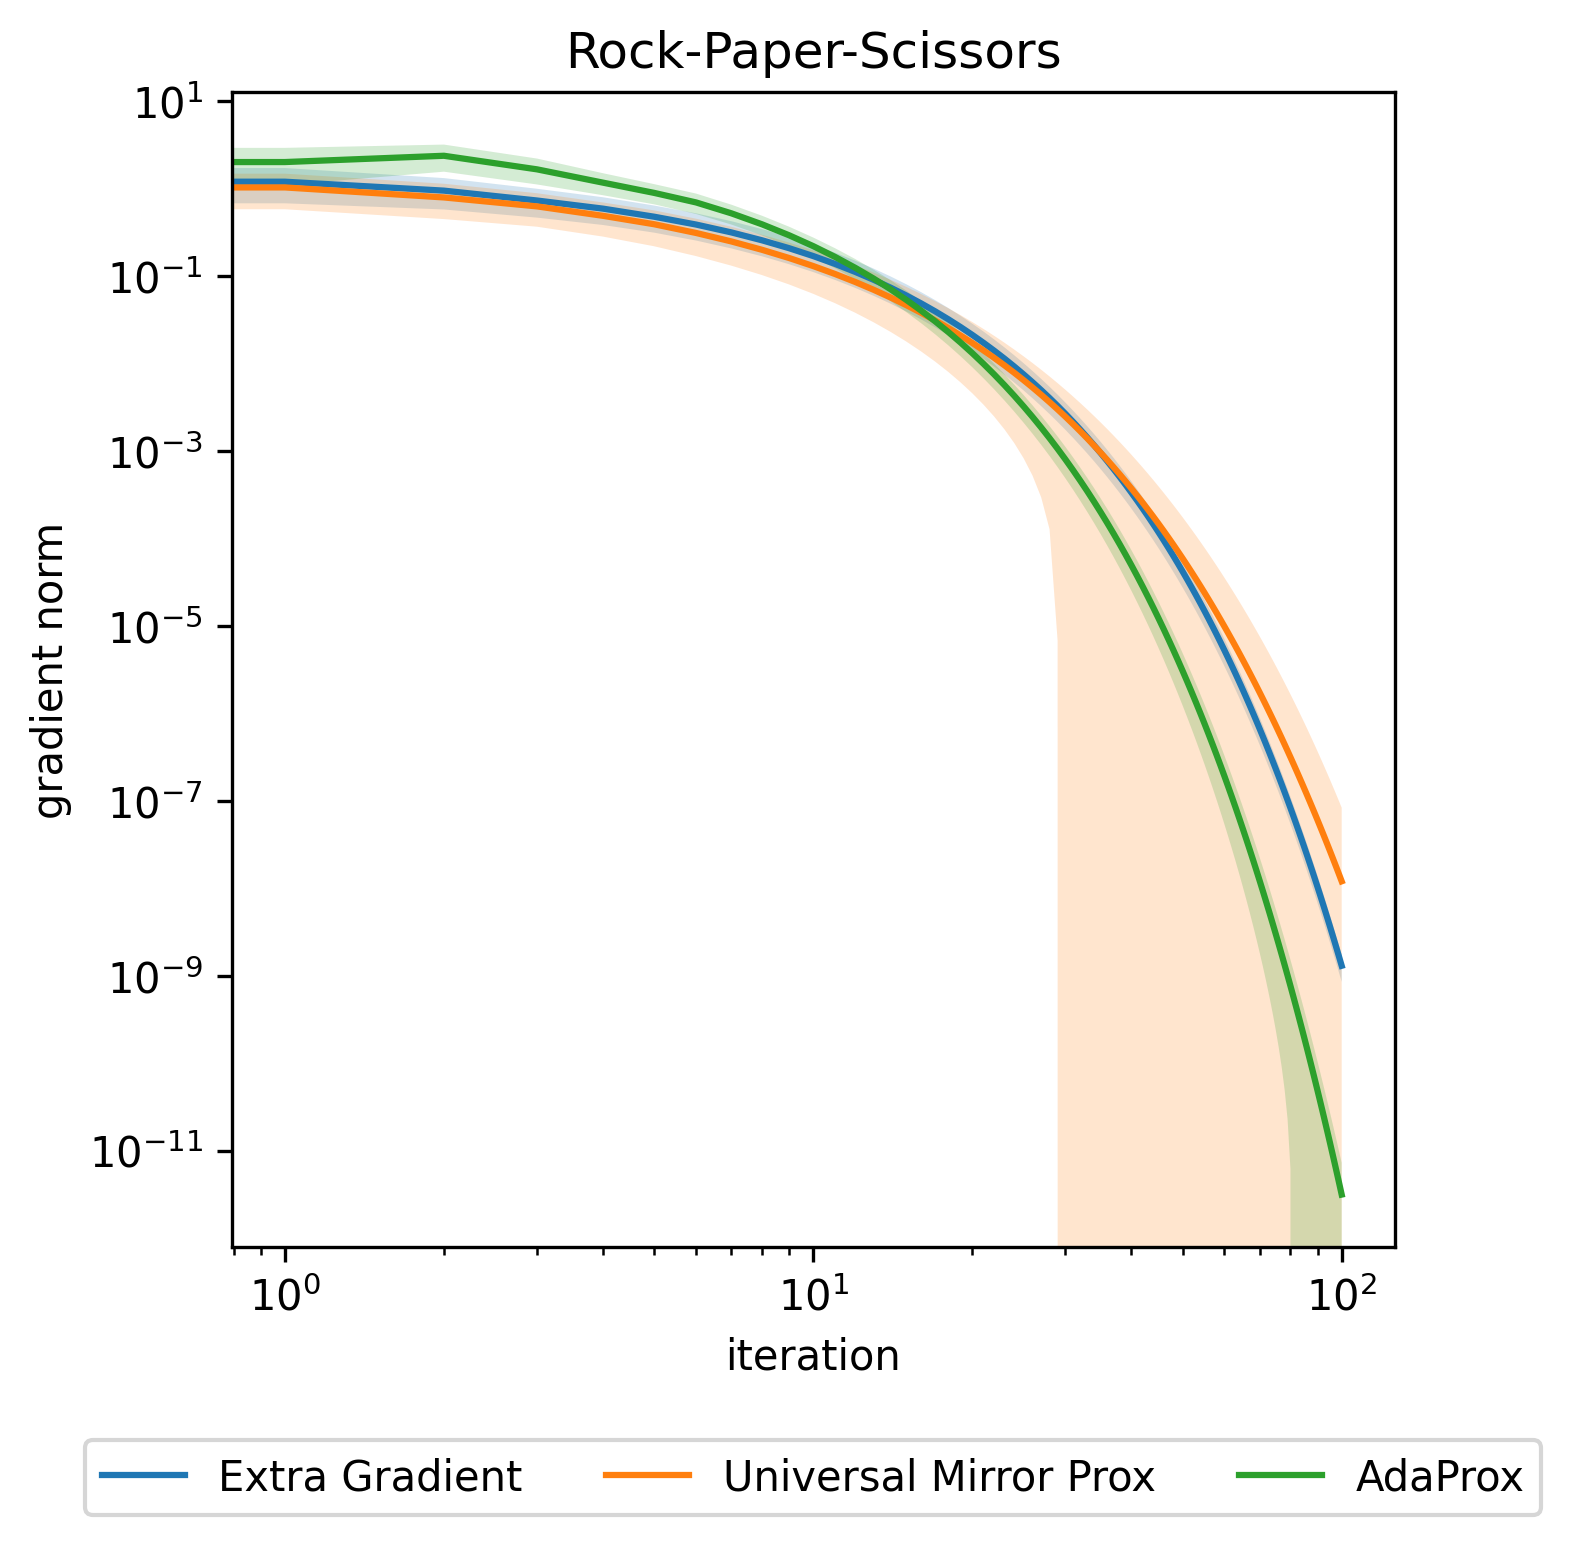

In [59]:
from problems import RockPaperScissorsPb

pb = RockPaperScissorsPb()
benchmark_pb(pb, show_sol=True, eg_eta=.5, title='Rock-Paper-Scissors', ergo=False)

# Battle of the sexes

trials ({'ergodic': False, 'eg_eta': 0.1}): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]


Solution Extra Gradient:
                0.0
                0.0
Solution Universal Mirror Prox:
                0.0
                0.0
Solution AdaProx:
                0.0
                0.0


trials ({'ergodic': True, 'eg_eta': 0.1}): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


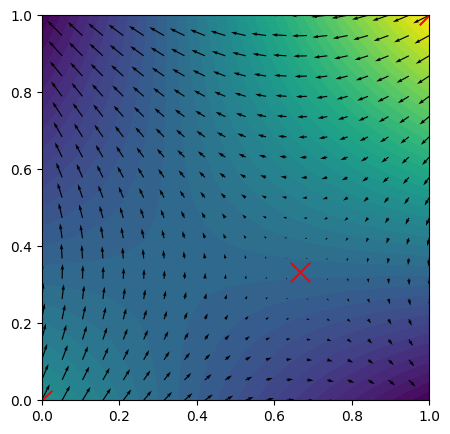

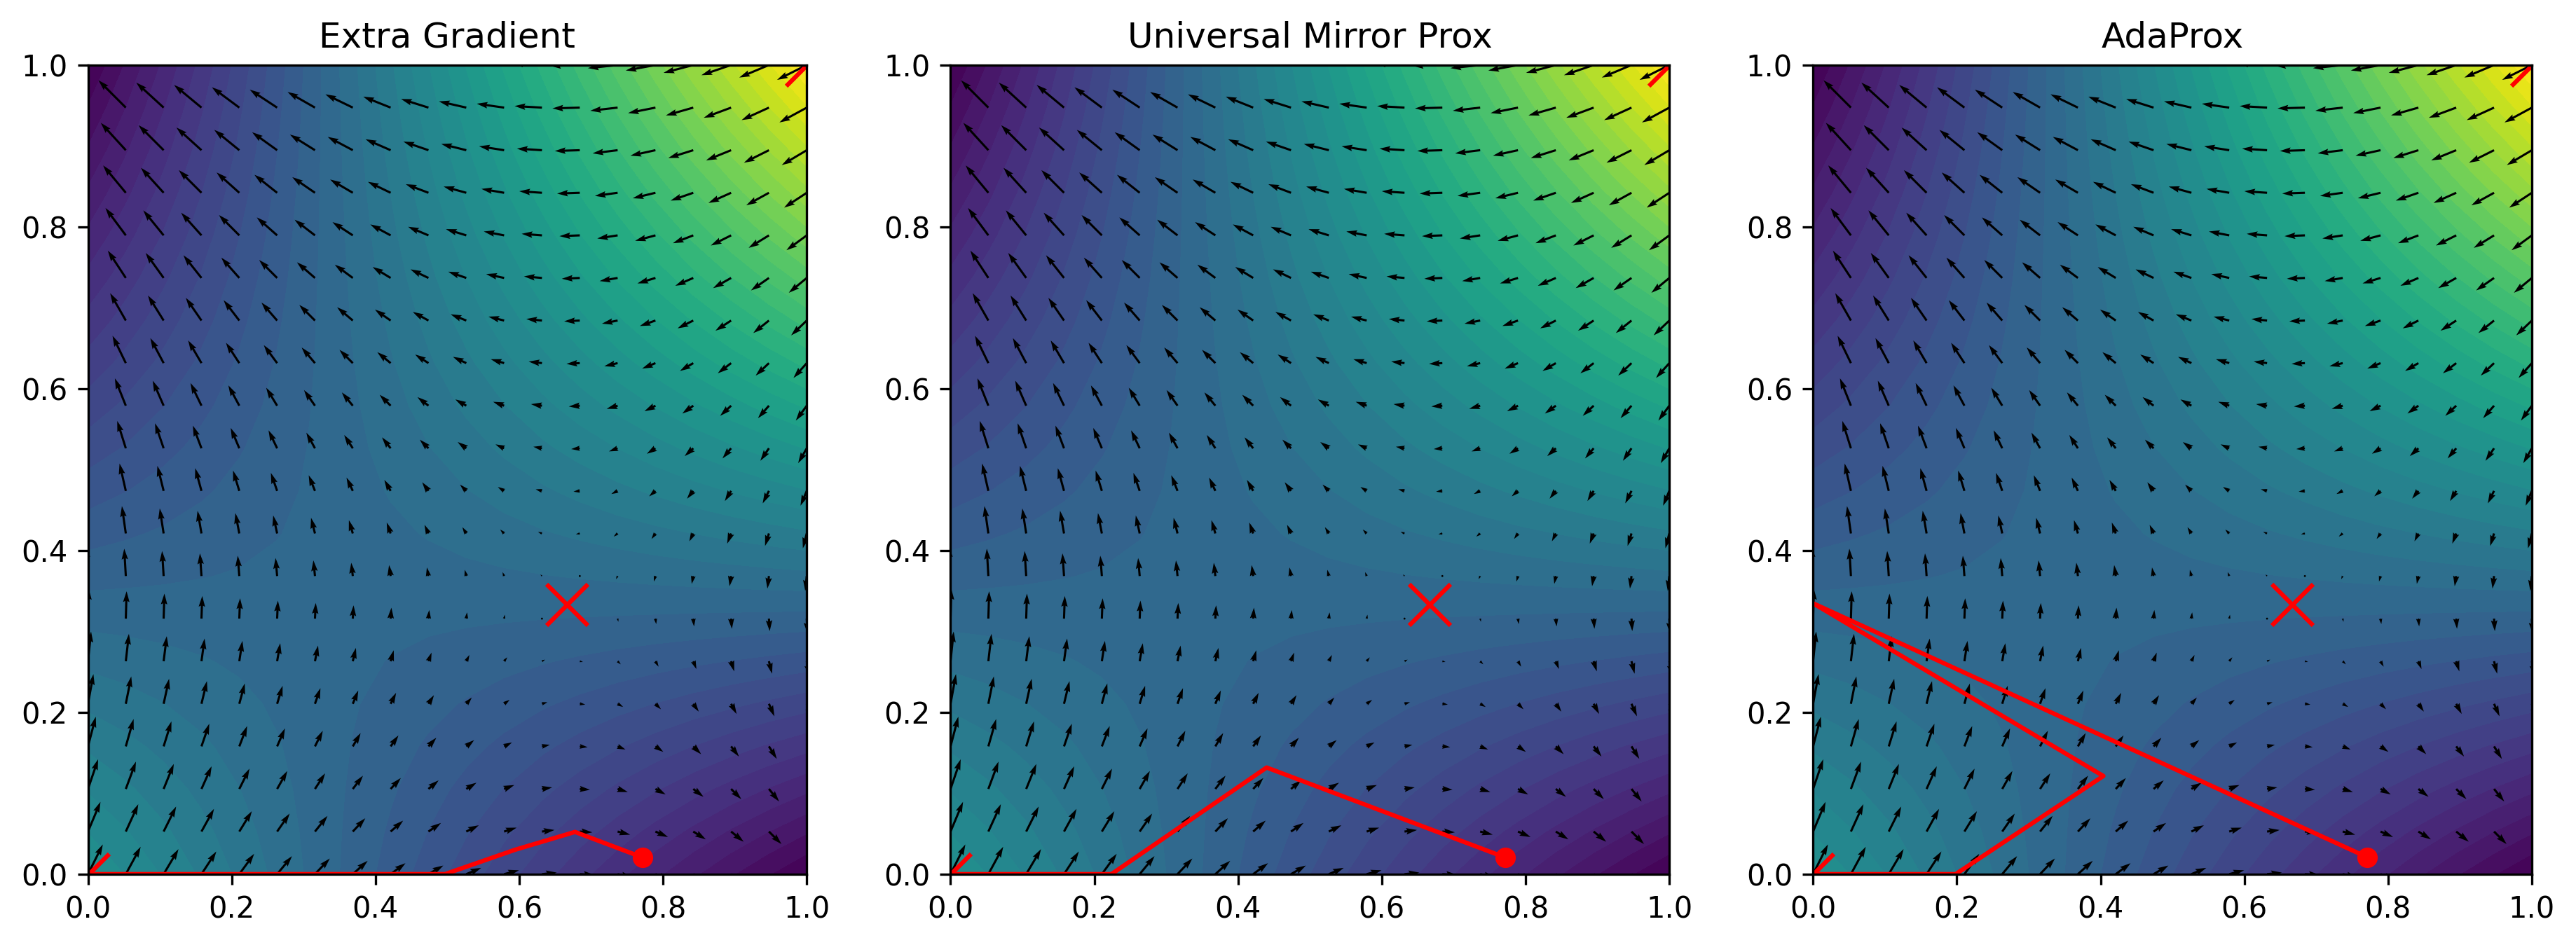

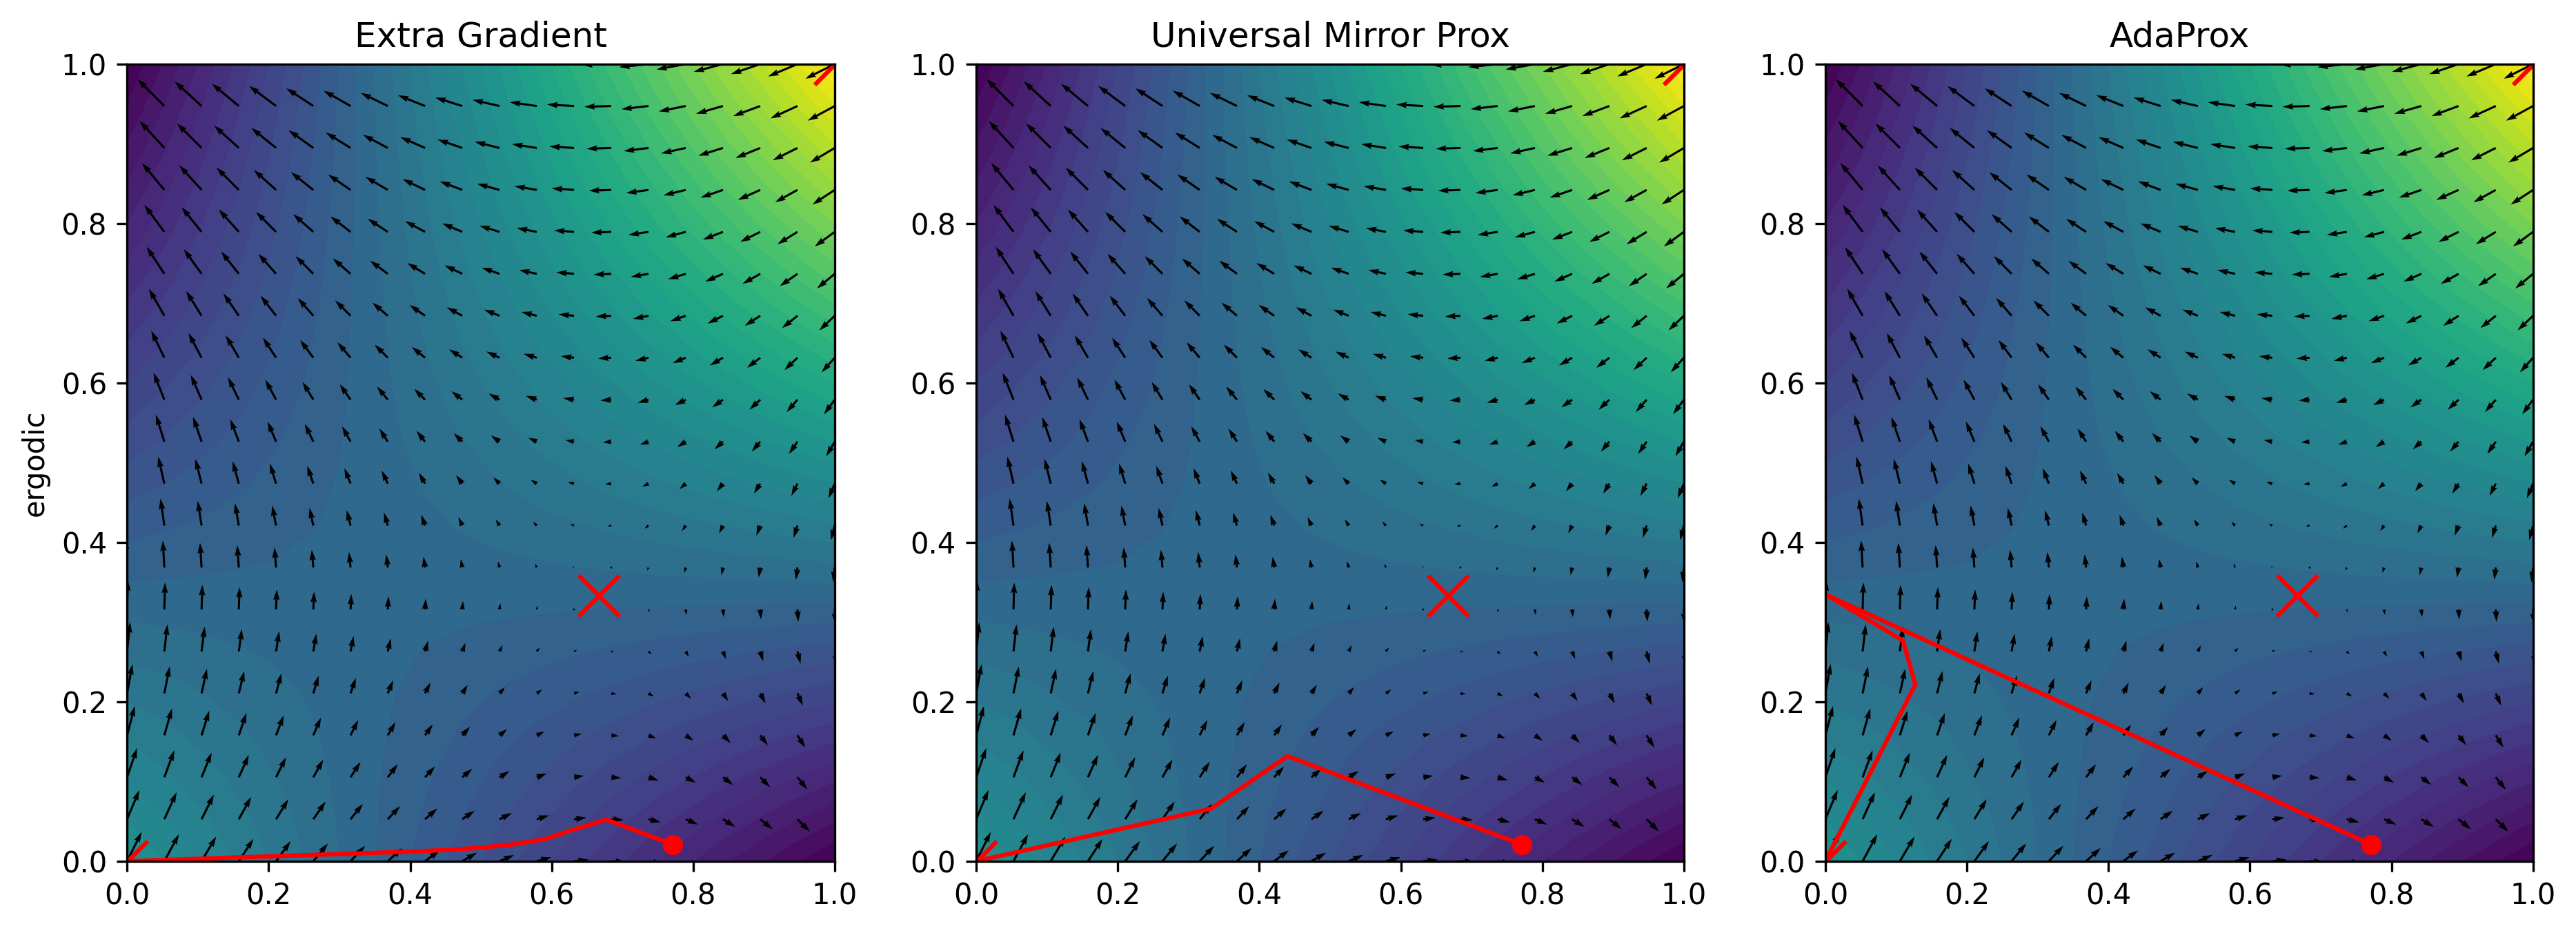

In [73]:
from problems import BattleOfTheSexesPb

pb = BattleOfTheSexesPb()
# benchmark_pb(pb, is_drawable=True, show_sol=True, eg_eta=.1)
benchmark_pb(pb, show_sol=True, is_drawable=True, eg_eta=.1, ergo=False, title='Battle of the Sexes', seed=10)

# Prisoner's dilemma

trials ({'ergodic': False, 'eg_eta': 1}): 100%|██████████| 1/1 [00:00<00:00, 51.62it/s]


Solution Extra Gradient:
                1.0
                1.0
Solution Universal Mirror Prox:
                1.0
                1.0
Solution AdaProx:
                1.0
                1.0


trials ({'ergodic': False, 'eg_eta': 1}): 100%|██████████| 100/100 [00:01<00:00, 56.23it/s]


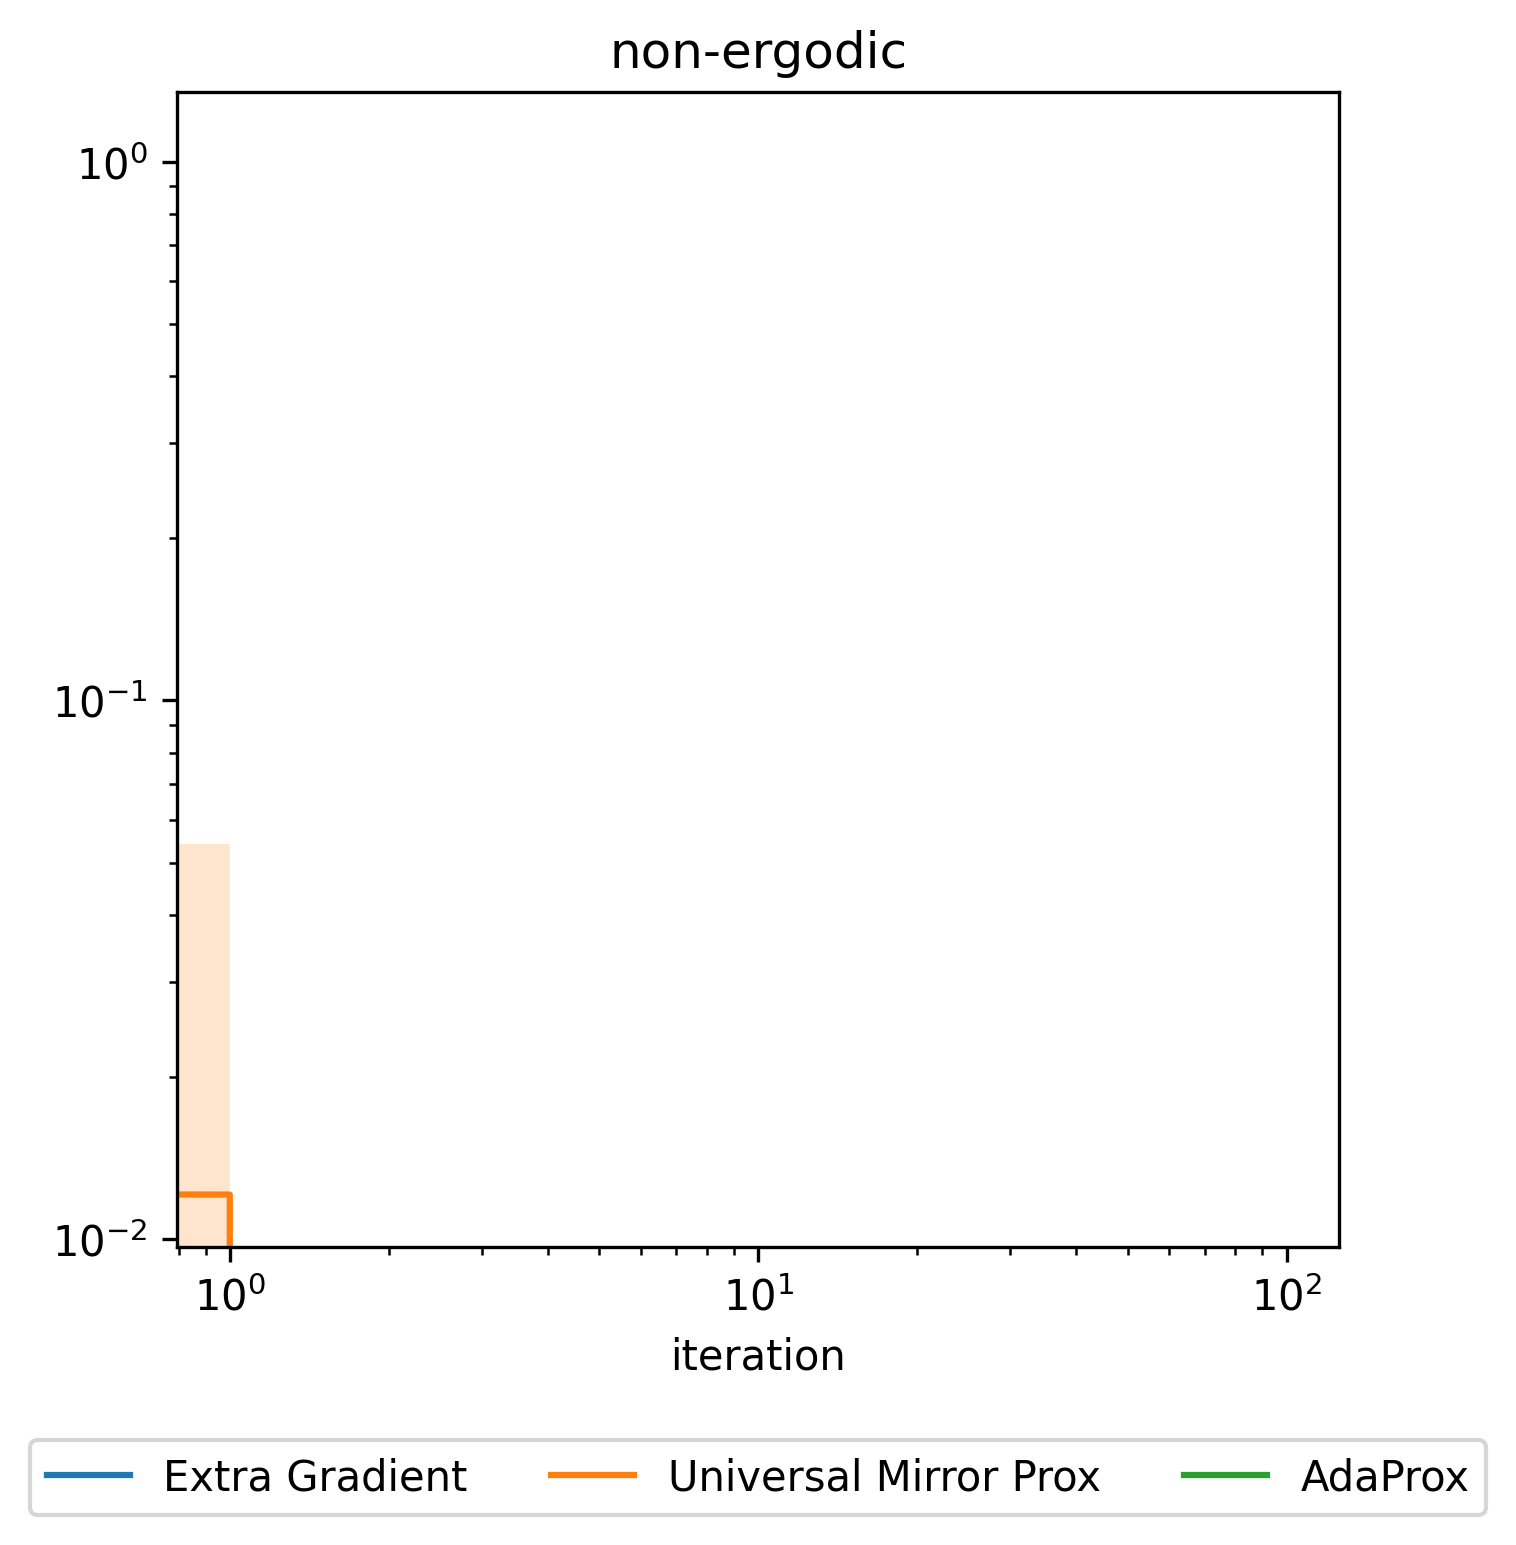

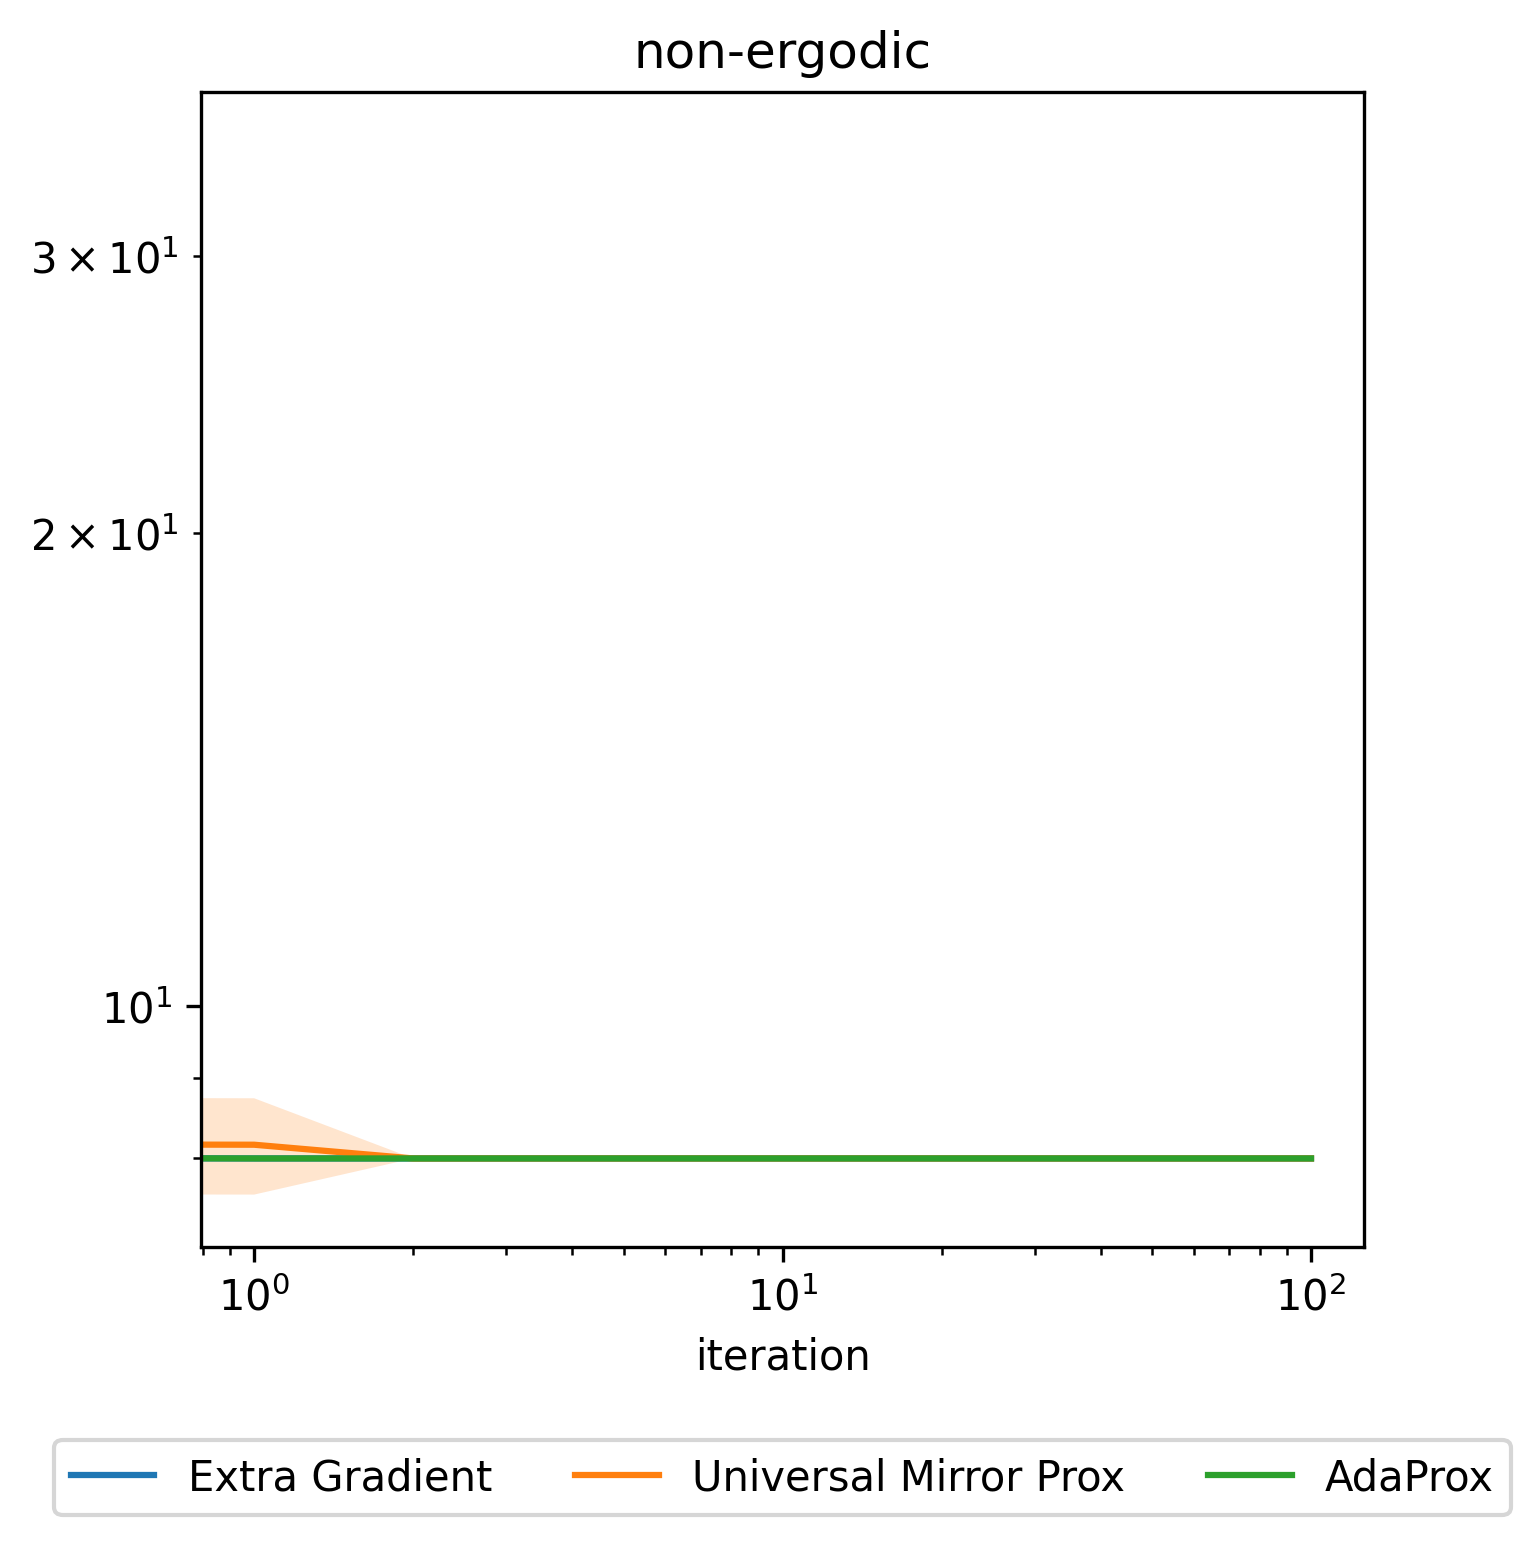

In [64]:
from problems import PrisonerDilemma

pb = PrisonerDilemma()
benchmark_pb(pb, show_sol=True, ergo=False)

# Matching Pennies problem

trials ({'ergodic': False, 'eg_eta': 0.1}): 100%|██████████| 1/1 [00:00<00:00, 45.28it/s]


Solution Extra Gradient:
                0.49975391802848335
                0.5003124053707917
Solution Universal Mirror Prox:
                0.4999989720009913
                0.4999991091681875
Solution AdaProx:
                0.500000023266047
                0.49999906223623664


trials ({'ergodic': False, 'eg_eta': 0.1}): 100%|██████████| 100/100 [00:01<00:00, 55.03it/s]


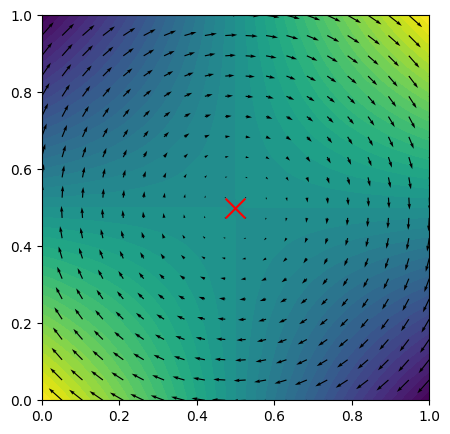

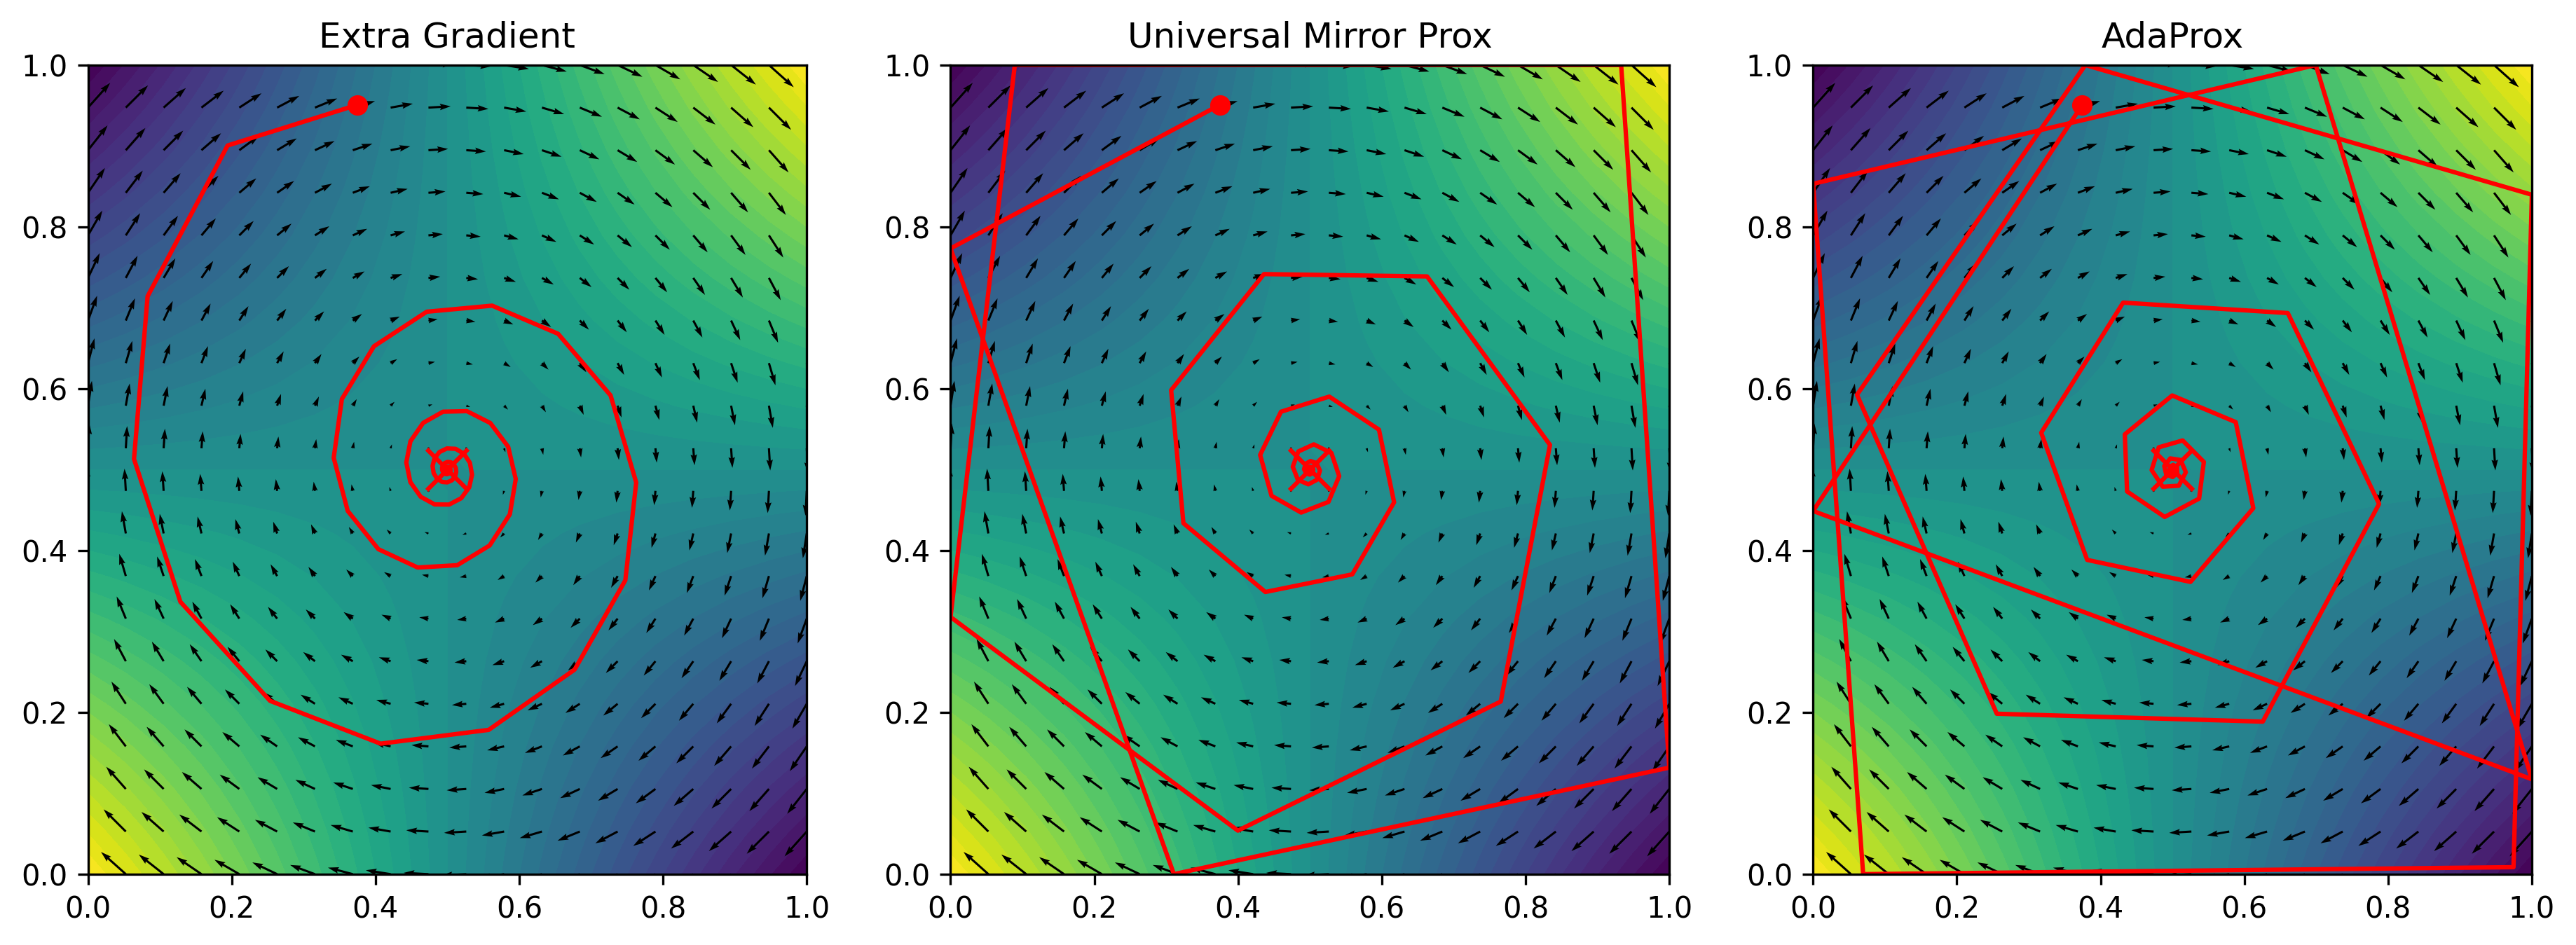

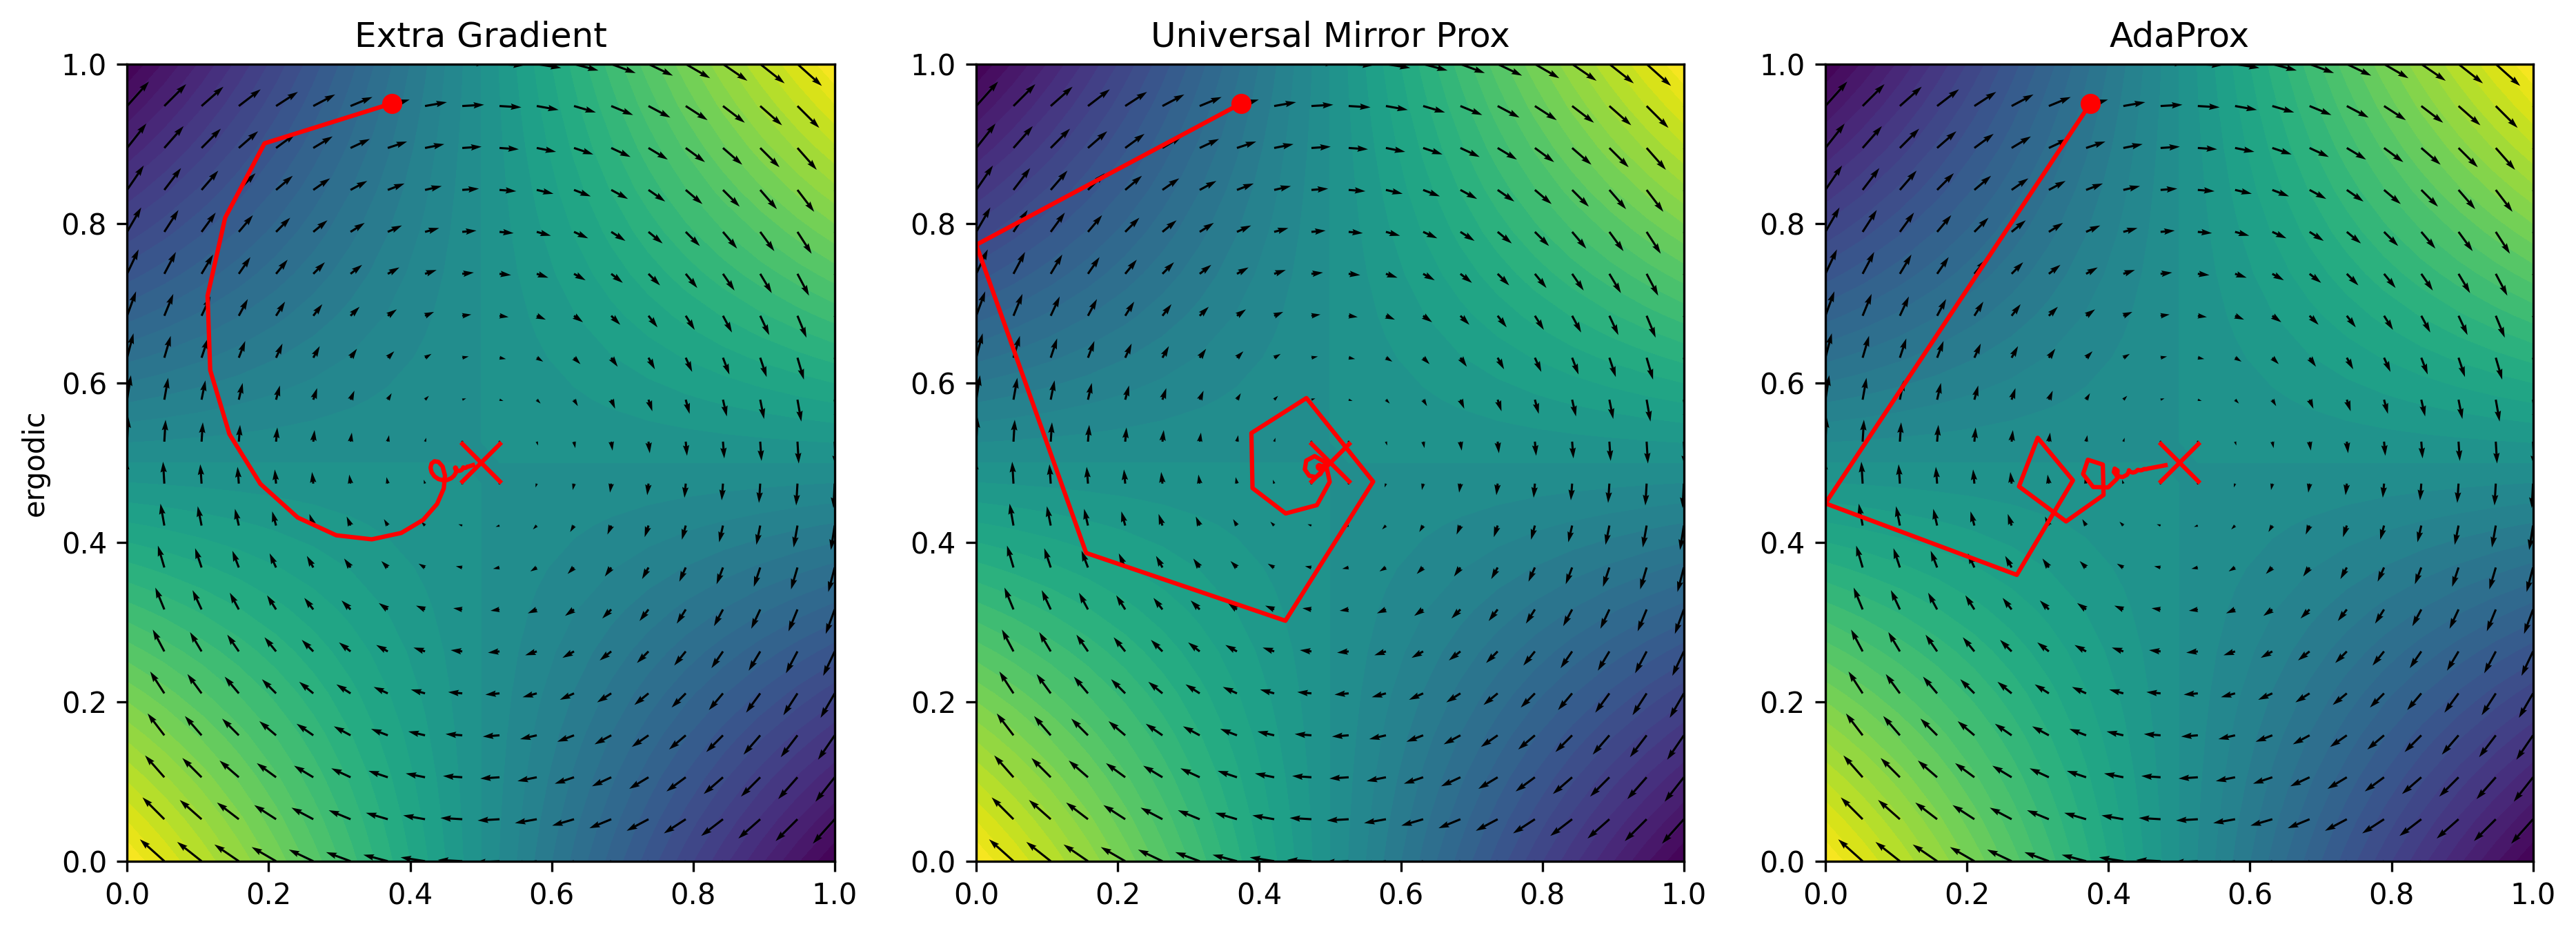

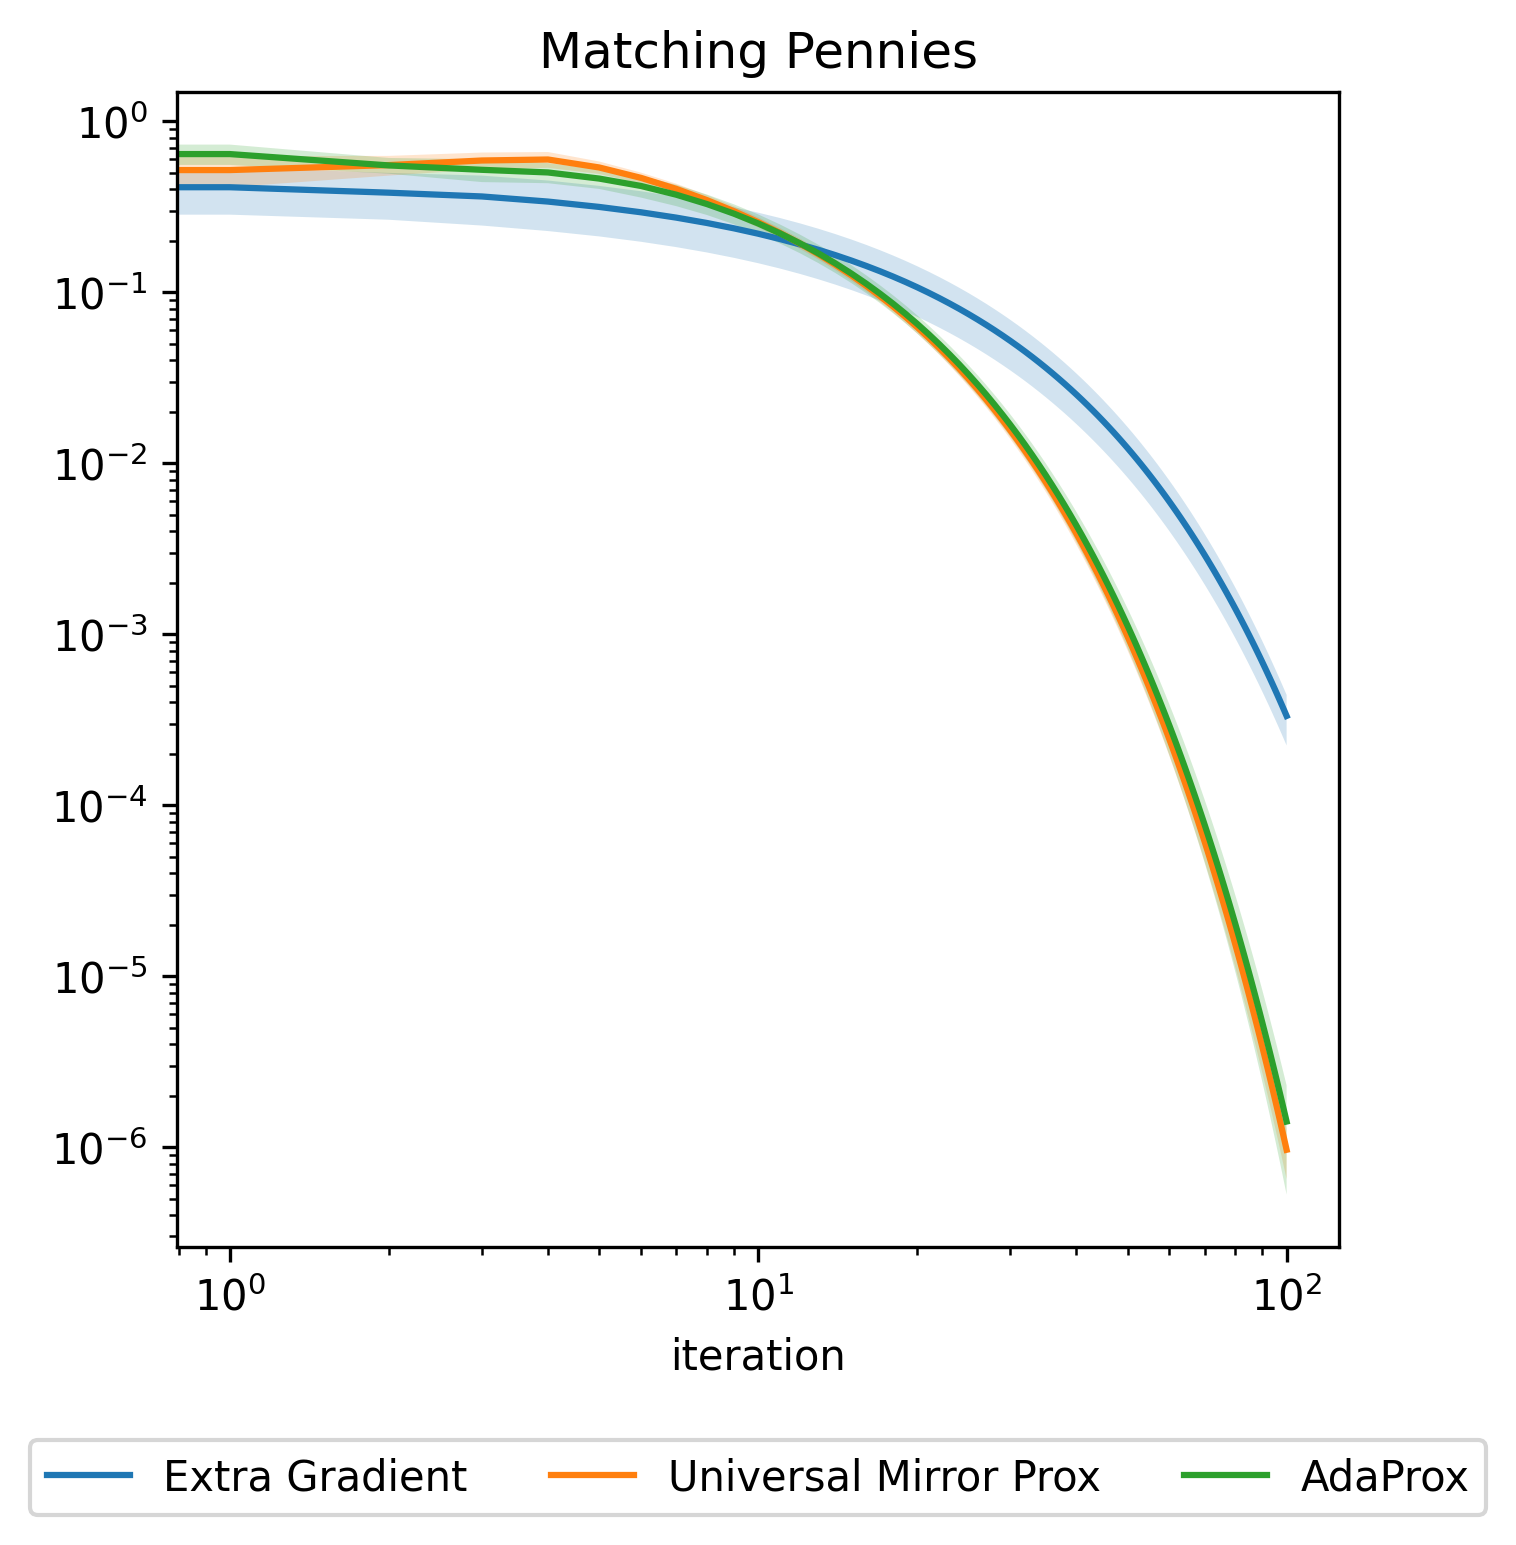

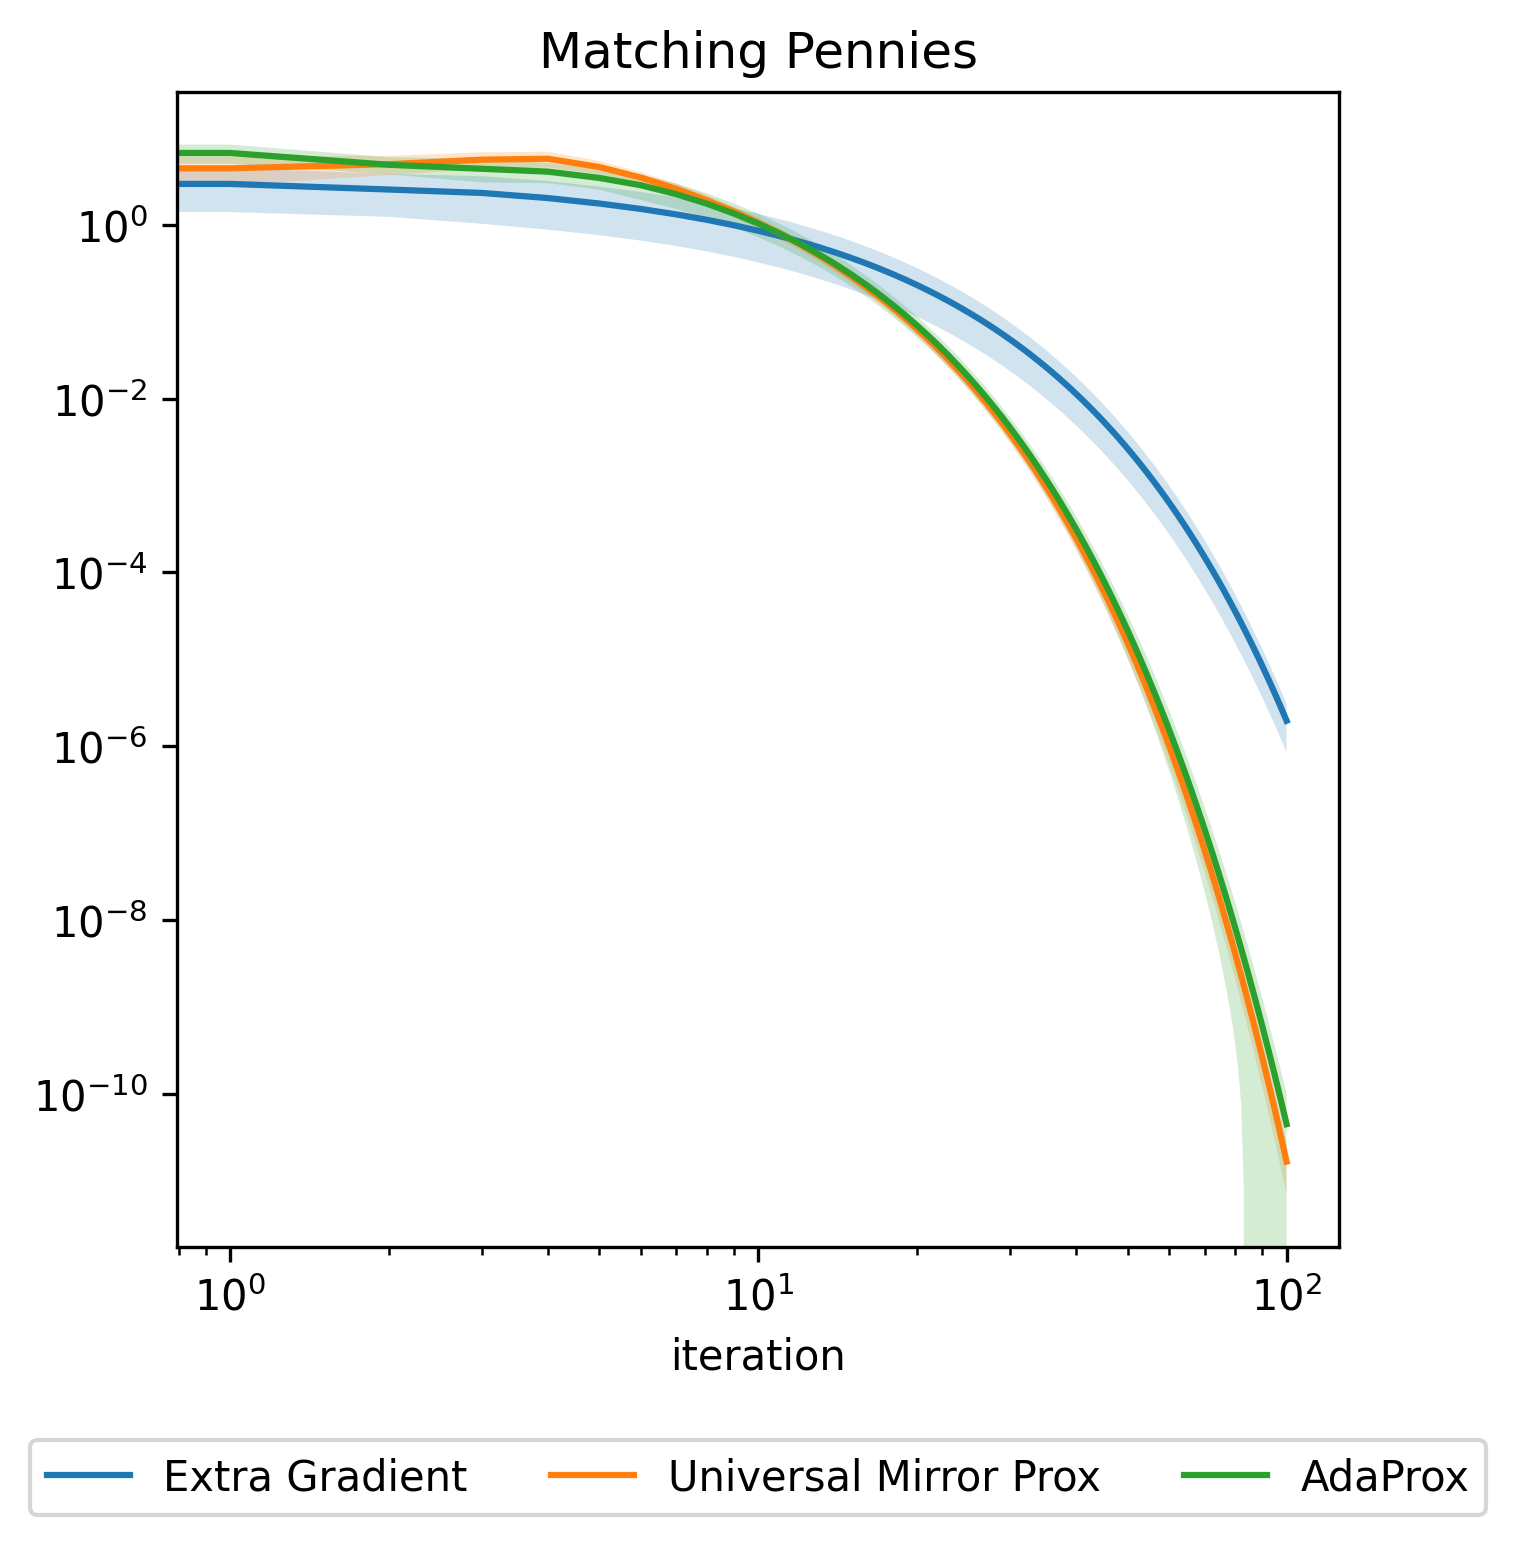

In [66]:
from problems import MatchingPennies

pb = MatchingPennies()
benchmark_pb(pb, show_sol=True, ergo=False, is_drawable=True, eg_eta=.1, title='Matching Pennies')

# Paper resource allocation problem

trials ({'ergodic': False, 'eg_eta': 1, 'dual_local_norm': <bound method RessourceAllocationPb.dual_local_norm of <problems.ressource_allocation.RessourceAllocationPb object at 0x28fb107f0>>}): 100%|██████████| 1/1 [00:00<00:00, 50.11it/s]


Solution Universal Mirror Prox:
                [1.00000000e+00 4.99999959e-11]
Solution AdaProx:
                [1.00000000e+00 4.99999959e-11]


trials ({'ergodic': True, 'eg_eta': 1, 'dual_local_norm': <bound method RessourceAllocationPb.dual_local_norm of <problems.ressource_allocation.RessourceAllocationPb object at 0x28fb107f0>>}): 100%|██████████| 1/1 [00:00<00:00, 37.65it/s]
trials ({'ergodic': False, 'eg_eta': 1, 'dual_local_norm': <bound method RessourceAllocationPb.dual_local_norm of <problems.ressource_allocation.RessourceAllocationPb object at 0x28fb107f0>>}): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]
trials ({'ergodic': True, 'eg_eta': 1, 'dual_local_norm': <bound method RessourceAllocationPb.dual_local_norm of <problems.ressource_allocation.RessourceAllocationPb object at 0x28fb107f0>>}): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


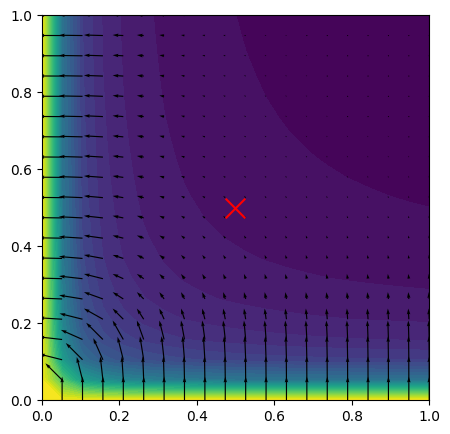

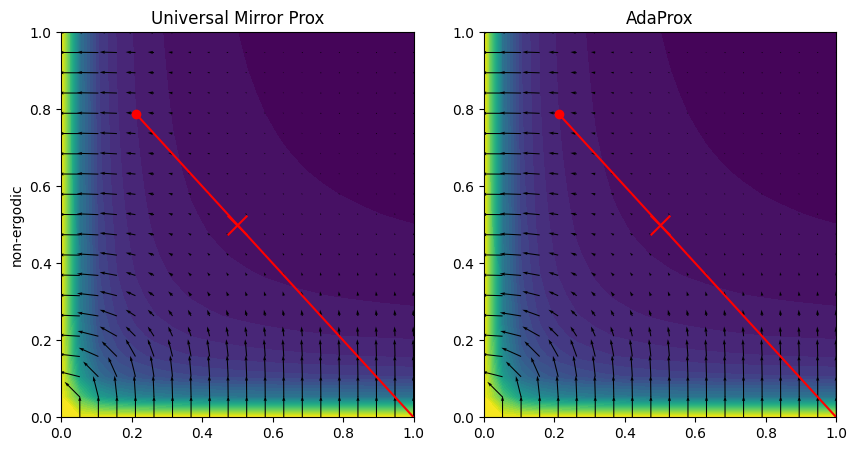

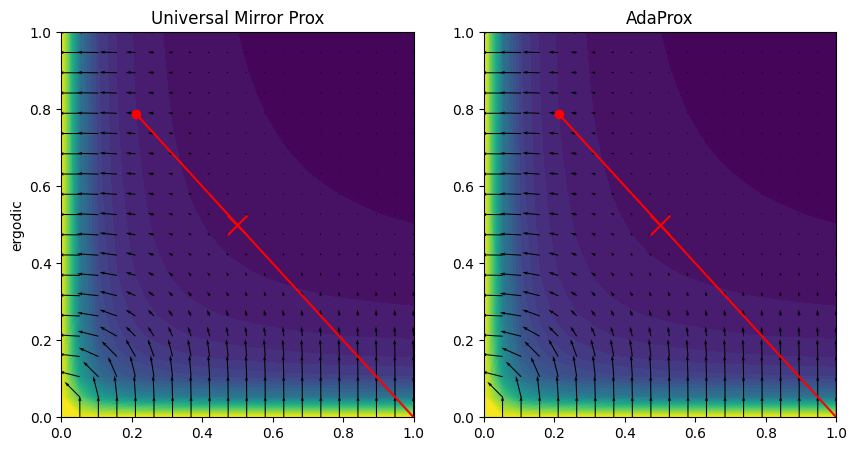

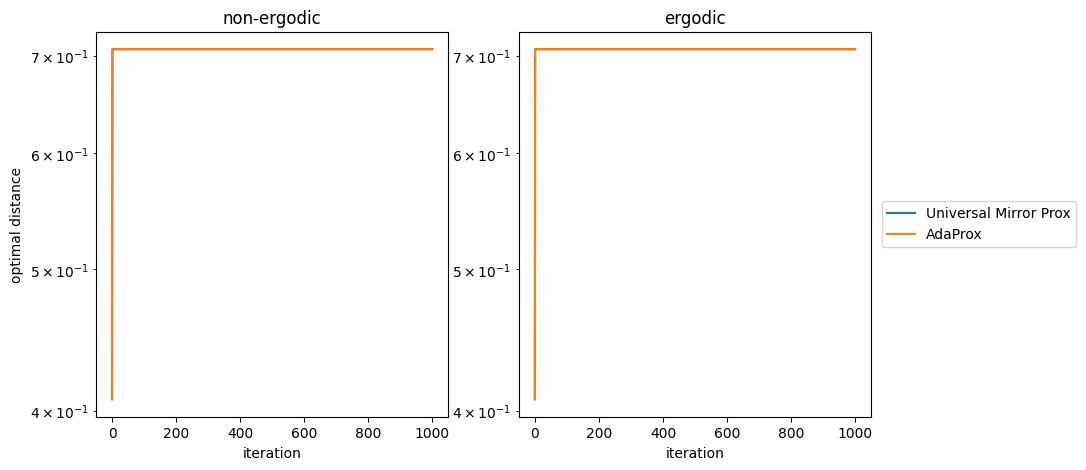

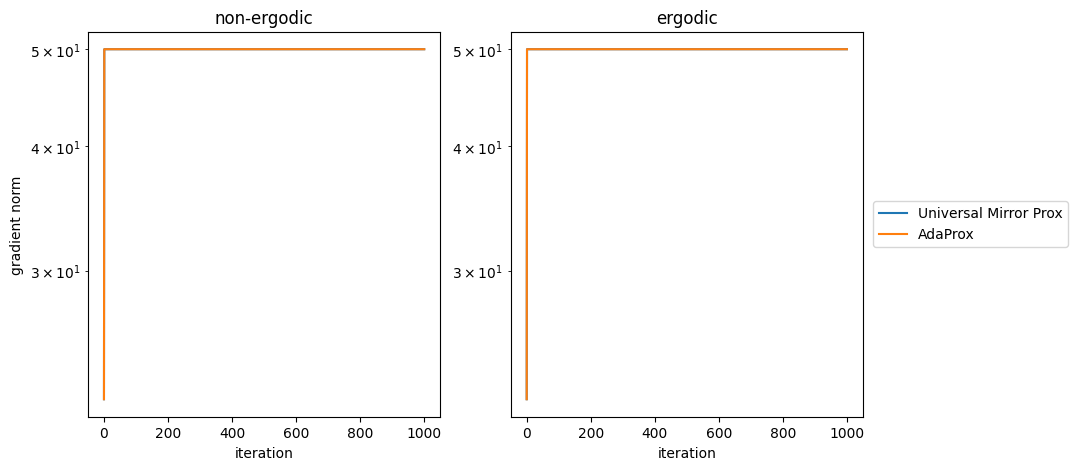

In [223]:
from problems import RessourceAllocationPb

pb = RessourceAllocationPb()
benchmark_pb(pb, is_drawable=True, show_sol=True, dual_local_norm=pb.dual_local_norm)

# Paper bilinear 

trials ({'ergodic': True, 'eg_eta': 0.025}): 100%|██████████| 100/100 [01:57<00:00,  1.17s/it]


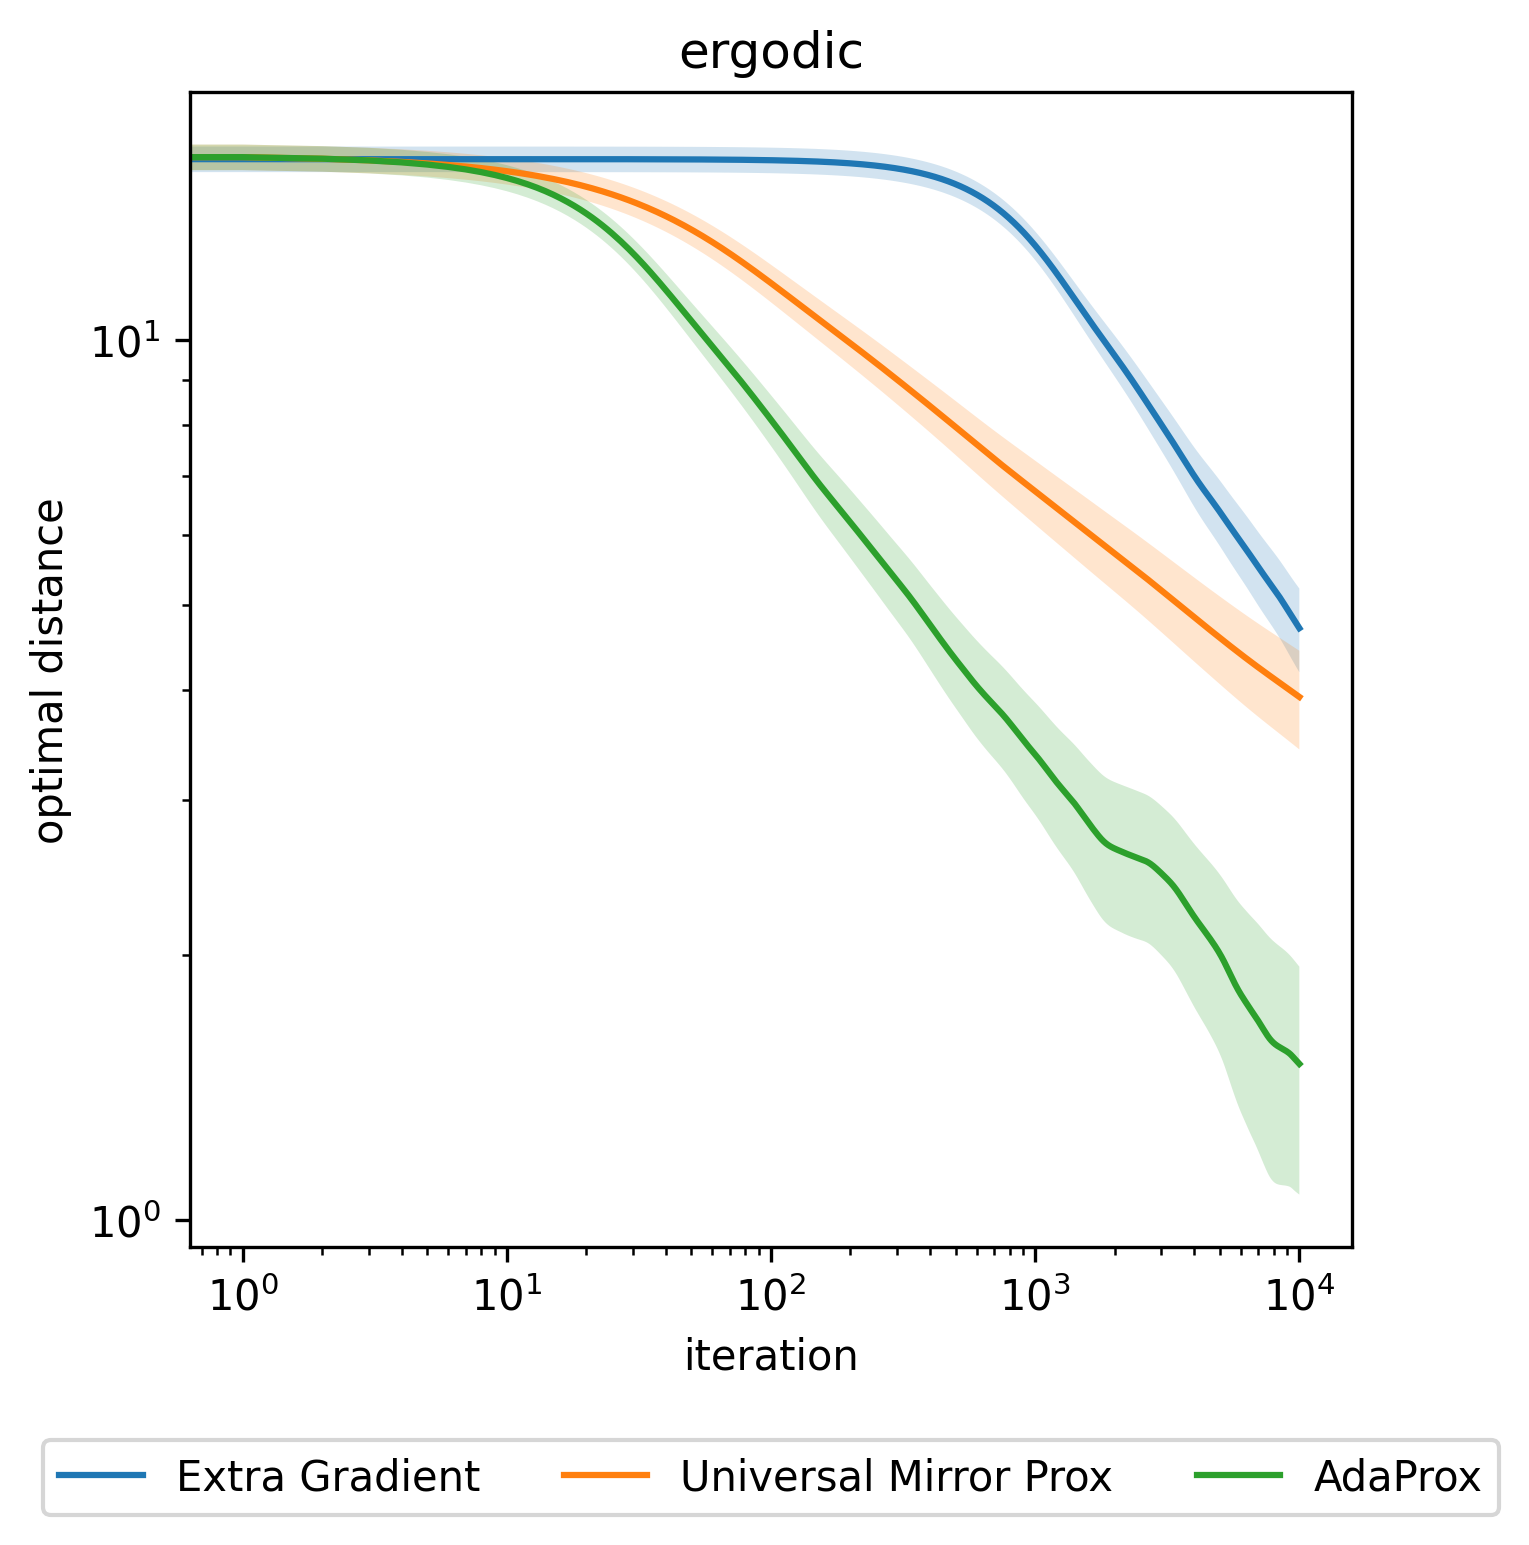

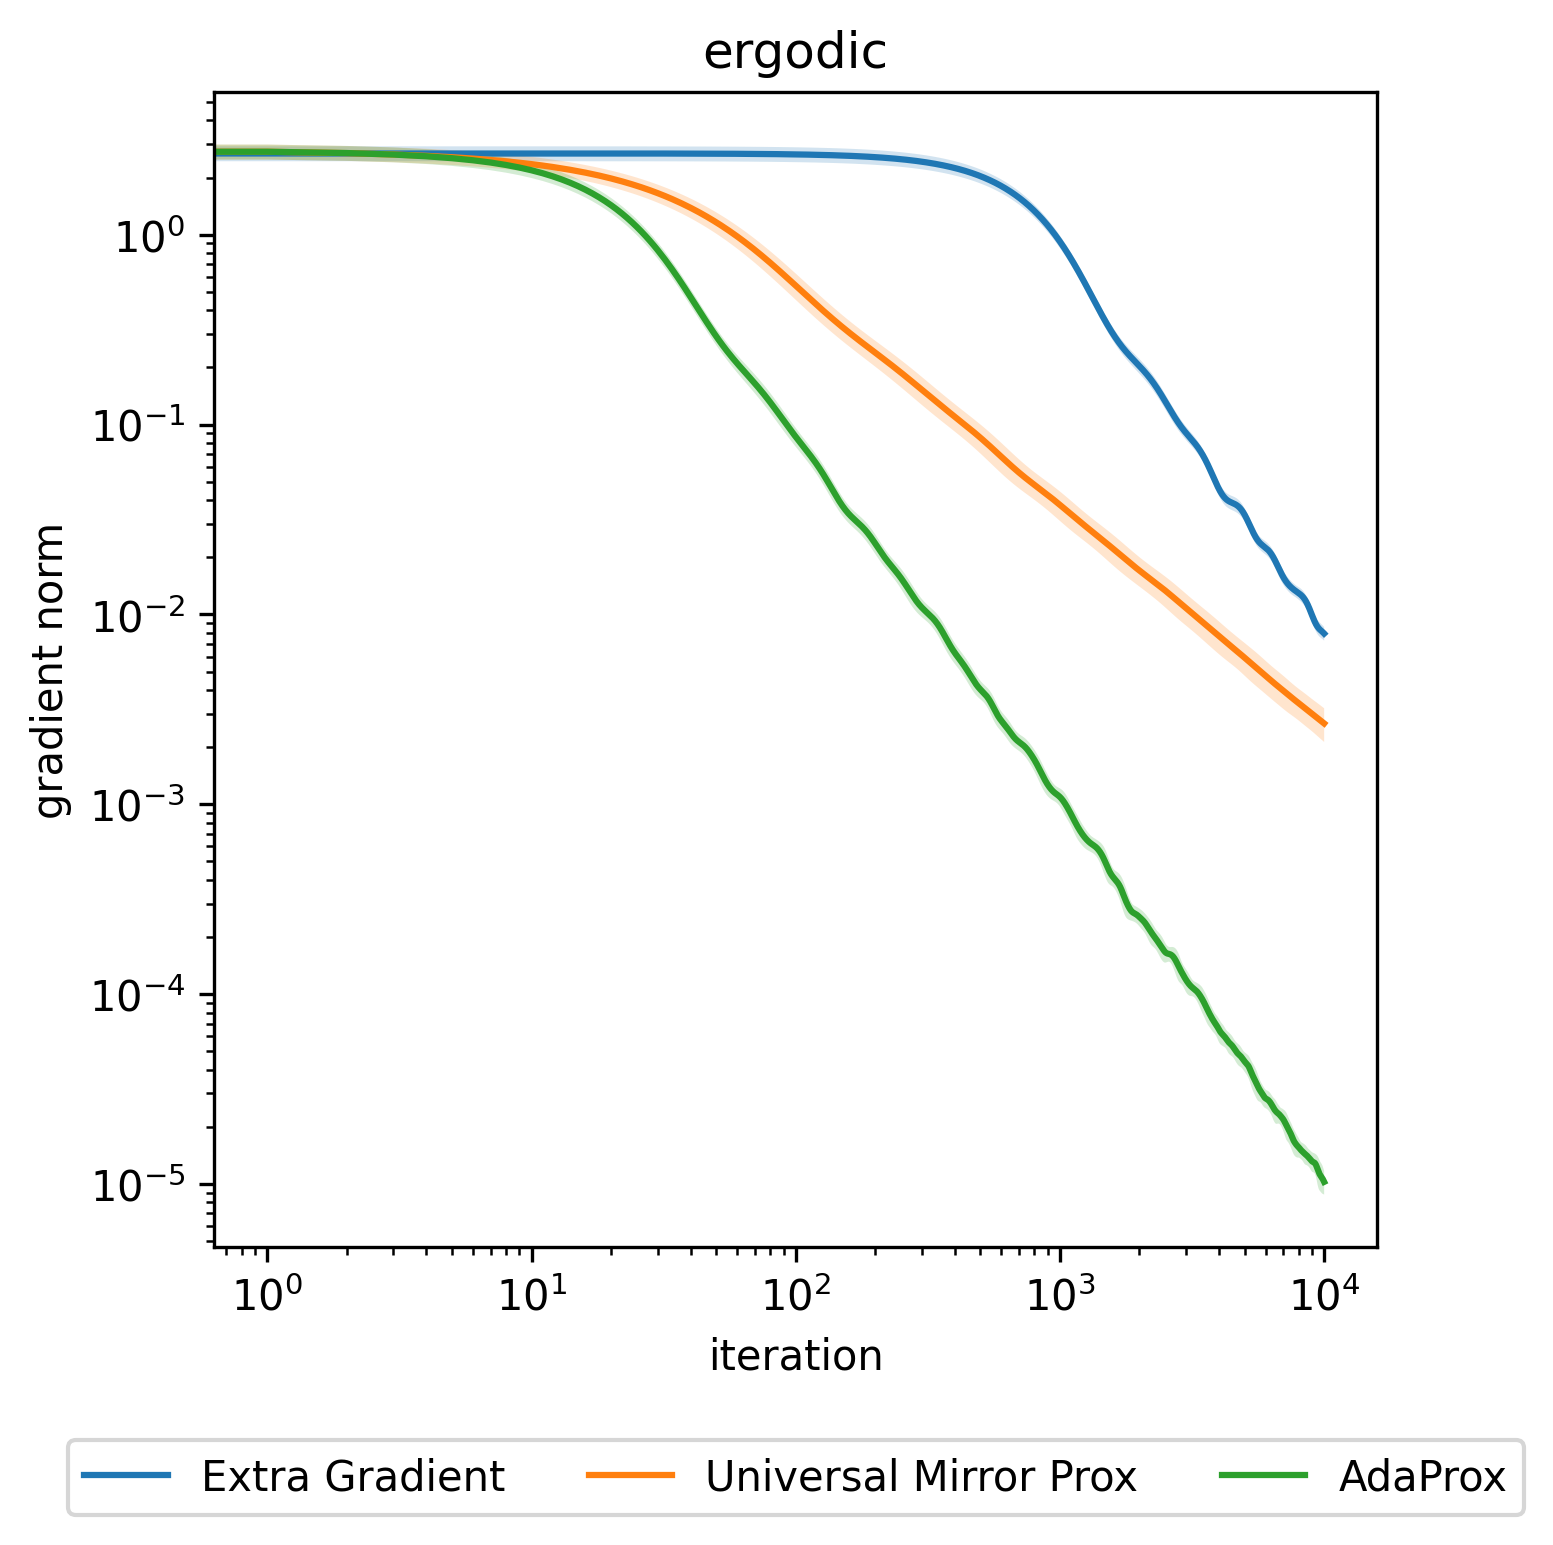

In [14]:
from problems import BilinearMinMax

pb = BilinearMinMax(dim=100, space=(-1, 1))
benchmark_pb(pb, no_ergo=False, eg_eta=.025)

(-1, 1)


trials ({'ergodic': True, 'eg_eta': 1}): 100%|██████████| 10/10 [00:04<00:00,  2.42it/s]


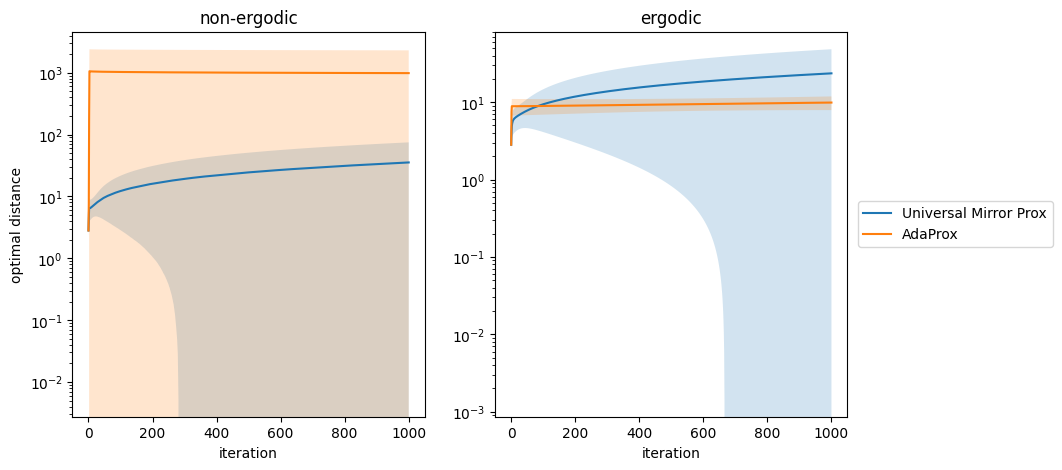

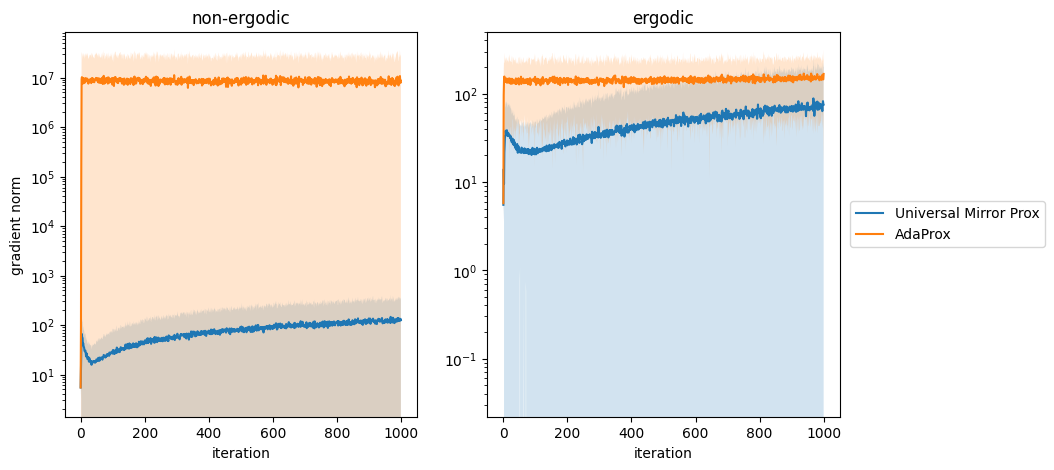

In [237]:
# WIP
from problems import CovMatrixLearning

pb = CovMatrixLearning(space=(-1, 1))
benchmark_pb(pb)